In [509]:
import os
os.chdir('../quafing/')
print(f"Working directory: {os.getcwd()}")
import quafing as q


import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr


plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15, 
                     "figure.dpi" : 100, 
                     "legend.fontsize" : 13, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True, 
                     "figure.figsize":(6, 5)})

Working directory: /Users/charlesdupont/Desktop/Thesis/code/quafing


In [510]:
def load_data(path):
    """
    Loads .dta file using provided path.
    """
    return pd.read_stata(path, convert_categoricals=False)


def plot_missing_prop(df):
    """
    Plots bar graph to visualize proportion of missing entries for each column of provided df.
    """
    missing_prop = {}
    L = len(df)
    for col in df.columns:
        missing_prop[col] = df[col].isna().sum()/L
    ordered_keys = sorted(missing_prop.keys(), key=lambda x: missing_prop[x], reverse=True)
    plt.figure(figsize=(10, 4))
    plt.bar(np.arange(len(missing_prop)), [missing_prop[k] for k in ordered_keys], color="dodgerblue")
    plt.xticks(np.arange(len(missing_prop)), ordered_keys, rotation=90)
    plt.ylabel("Proportion Missing")
    plt.show()
    
    
def plot_categorical_feature_frequency(df, col, sort=True, xlabel=None, xticks_dict={}, 
                                       save=False, save_filename=None):
    freq = Counter(df[col])
    freq = {k:v for k,v in freq.items() if not np.isnan(k)}
    L = len(freq)
    if sort:
        ordered_keys = sorted(freq.keys(), key=lambda x: freq[x], reverse=True)
    else:
        ordered_keys = sorted(freq.keys(), key=lambda x: x)
    plt.figure(figsize=(12,4))
    plt.bar(np.arange(L), [freq[k] for k in ordered_keys], color="dodgerblue", alpha=0.8)
    if xticks_dict:
        plt.xticks(np.arange(L), [xticks_dict[k] for k in ordered_keys], rotation=90)
    else:
        plt.xticks(np.arange(L), ordered_keys, rotation=90)
    plt.ylabel("Frequency")
    if xlabel:
        plt.xlabel(xlabel, labelpad=20)
    else:
        plt.xlabel(col, labelpad=20)
        
    if save:
        plt.savefig(save_filename)
        
    plt.show()

In [511]:
DATA_DIR = "../../BCCASII/"

# Household

In [512]:
DATA_SUBDIR = "Household/"

___

## Module A: Location and identification detail

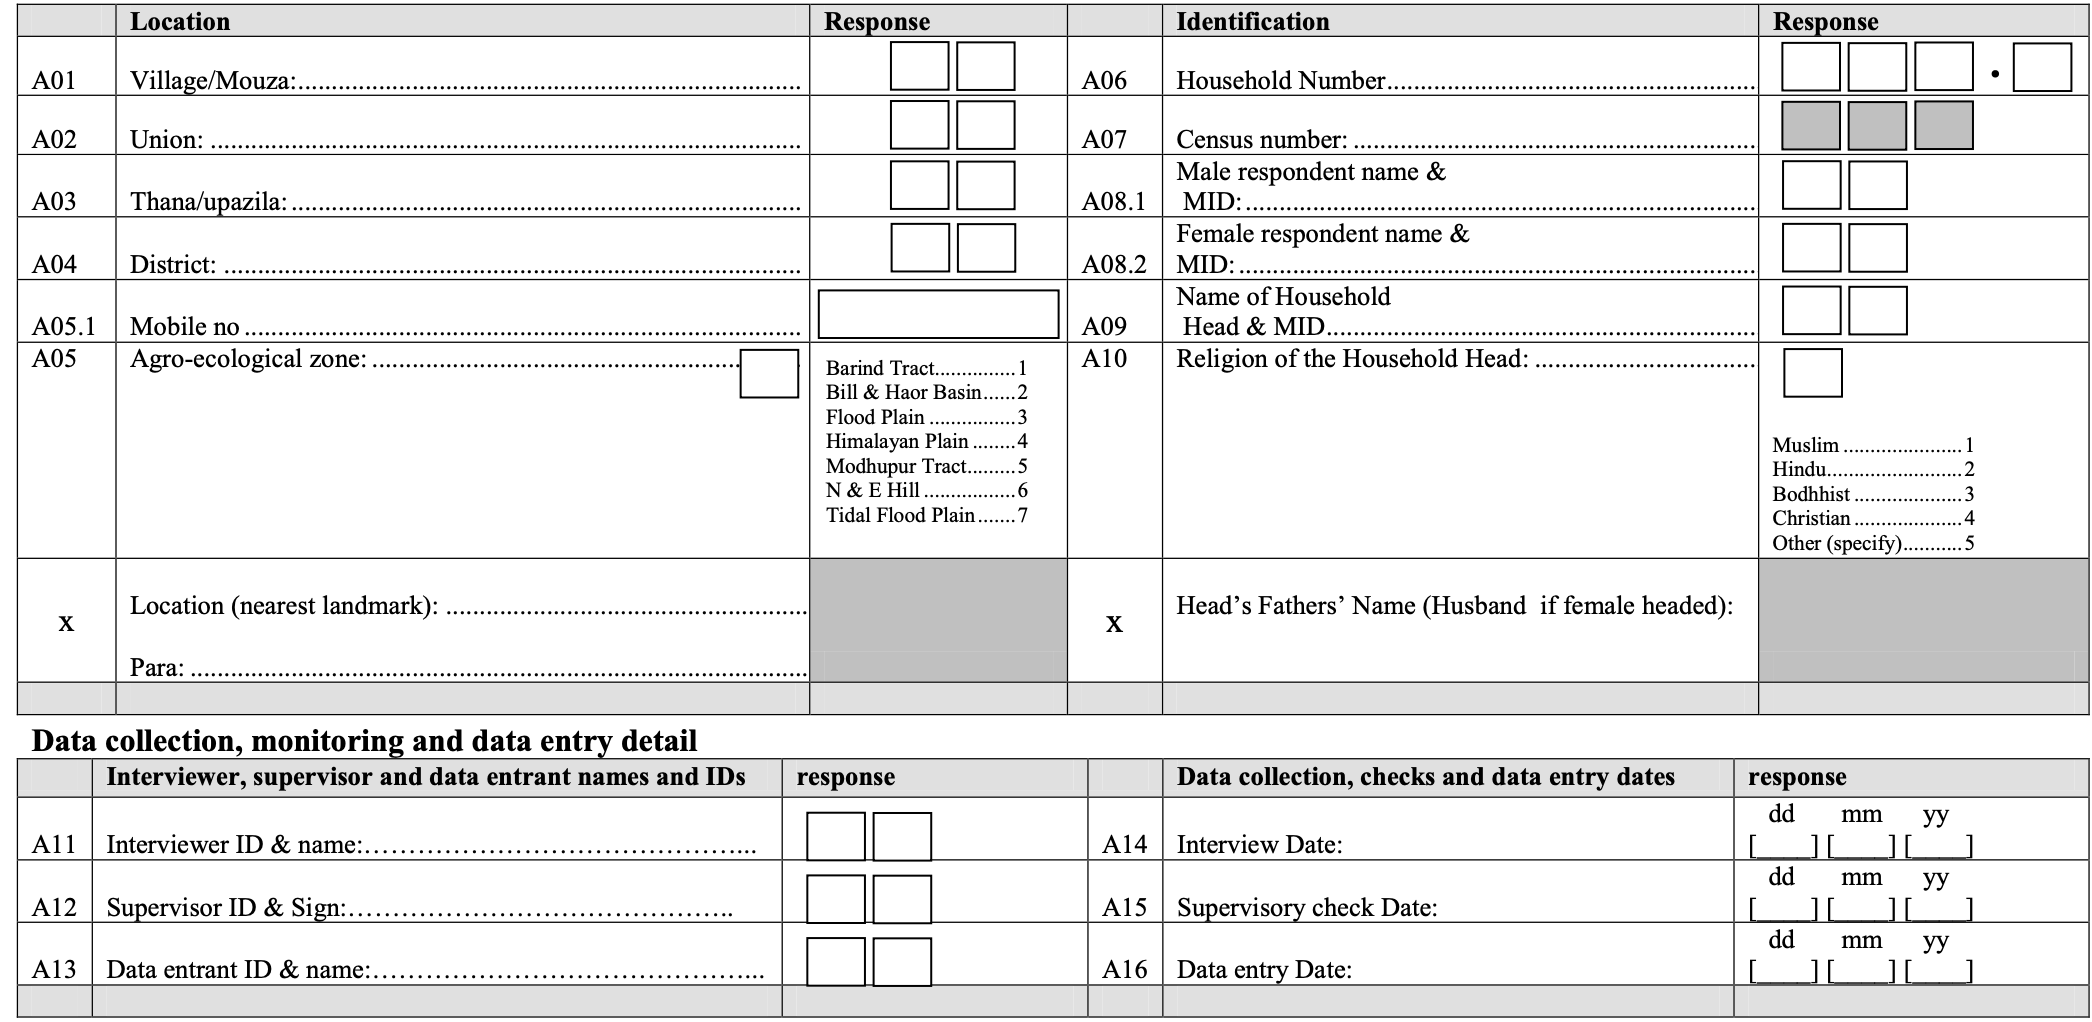

In [513]:
filename = "001_mod_a.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,vcode,ucode,tcode,dcode,phone,ezcode,hhid,rid_male,rid_female,hhhid,...,a14dd,a14mm,a14yy,a15dd,a15mm,a15yy,a16dd,a16mm,a16yy,flag
0,NaN,1,1,1,,7,1.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
1,NaN,1,1,1,,7,2.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,1,1,,7,3.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
3,NaN,1,1,1,,7,4.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
4,NaN,1,1,1,,7,5.0,NaN,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,NaN,40,39,31,,6,796.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,NaN,40,39,31,,6,797.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,NaN,40,39,31,,6,798.0,1.0,2.0,1.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,NaN,40,39,31,,6,799.0,8.0,2.0,2.0,...,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [529]:
communities = {}
for index, row in df.iterrows():
    c = (row["ucode"], row["tcode"], row["dcode"])
    if c not in communities:
        communities[c] = set()
    communities[c].add(row["hhid"])

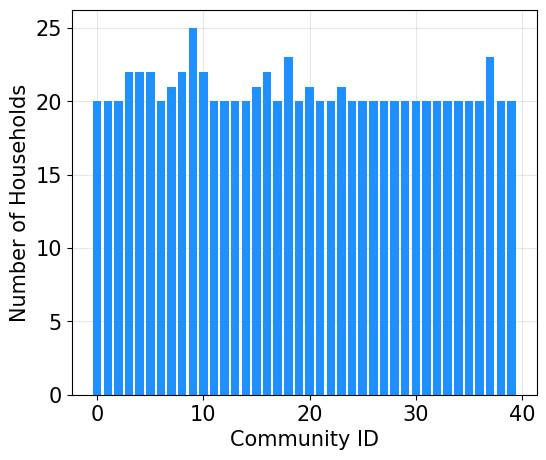

In [537]:
plt.bar(np.arange(len(communities.keys())), height=[len(communities[c]) for c in communities], color="dodgerblue")
plt.xlabel("Community ID")
plt.ylabel("Number of Households")
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vcode        0 non-null      float64
 1   ucode        827 non-null    int8   
 2   tcode        827 non-null    int8   
 3   dcode        827 non-null    int8   
 4   phone        827 non-null    object 
 5   ezcode       827 non-null    int8   
 6   hhid         827 non-null    float32
 7   rid_male     716 non-null    float64
 8   rid_female   795 non-null    float64
 9   hhhid        805 non-null    float64
 10  religion     0 non-null      float64
 11  interviewer  0 non-null      float64
 12  supervisor   0 non-null      float64
 13  a14dd        0 non-null      float64
 14  a14mm        0 non-null      float64
 15  a14yy        825 non-null    float64
 16  a15dd        0 non-null      float64
 17  a15mm        0 non-null      float64
 18  a15yy        283 non-null    float64
 19  a16dd   

### Villages

In [34]:
# only NAN values for village
df["vcode"].unique()

array([nan])

### Unions

There are 4562 unions in Bangladesh, each made up of nine "wards". Usually one village is designated as a ward, which is a local authority area.

There are 40 unique unions.


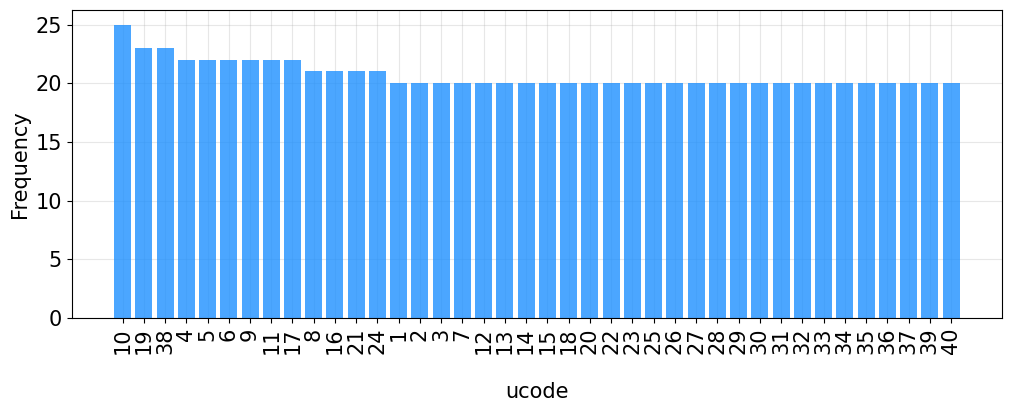

In [35]:
col = "ucode"
unique_unions = df[col].unique()
print(f"There are {len(unique_unions)} unique unions.")
plot_categorical_feature_frequency(df, col)

### Districts

There are 64 districts total in Bangladesh, further divided into 492 upazilas (sub-districts).

There are 30 unique districts.


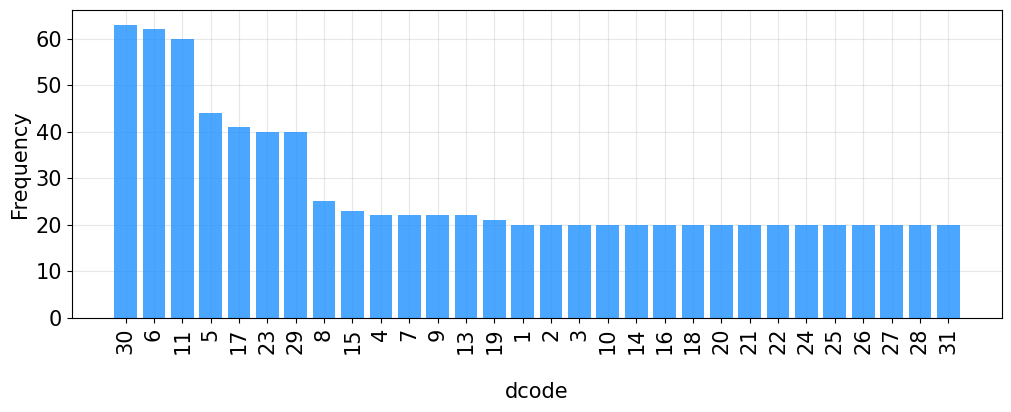

In [36]:
col = "dcode"
unique_districts = df[col].unique()
print(f"There are {len(unique_districts)} unique districts.")
plot_categorical_feature_frequency(df, col)

# dcode = 12 not present

### Thana/upazila

Upazilas are administrative region in Bangladesh, functioning as a sub-unit of a district.


There are 39 unique upazilas.


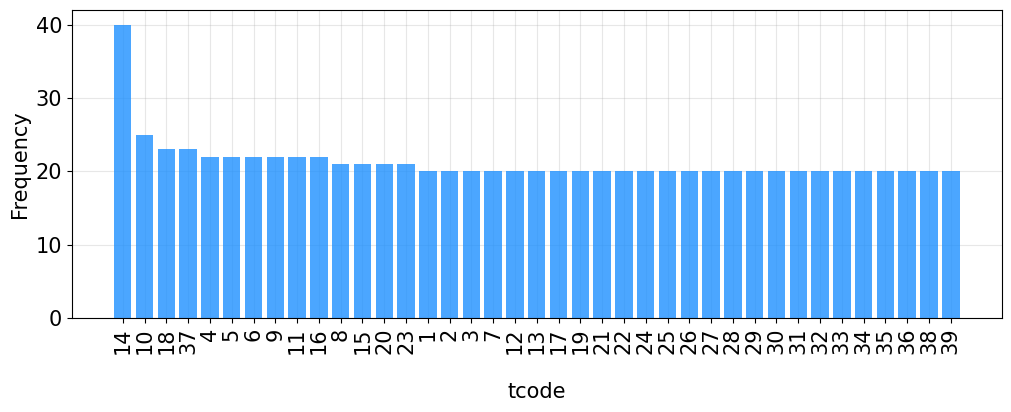

In [37]:
col = "tcode"
unique_upazilas = df[col].unique()
print(f"There are {len(unique_upazilas)} unique upazilas.")
plot_categorical_feature_frequency(df, col)

### Mobile number

In [38]:
# only empty values for mobile number
df["phone"].unique()

array([' '], dtype=object)

### Agro-ecological zone

There are 7 unique agro-ecological zones.


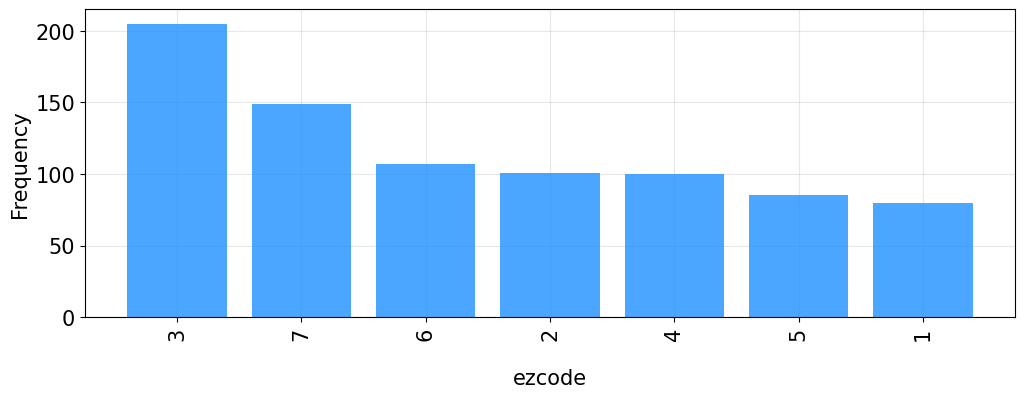

In [39]:
col = "ezcode"
unique_ezones = df[col].unique()
print(f"There are {len(unique_ezones)} unique agro-ecological zones.")
plot_categorical_feature_frequency(df, col)

### Household Number

In [40]:
L = len(df["hhid"].unique())
print(f"There are {L} unique households.")

There are 827 unique households.


### Male, female respondent identifiers

Not entirely sure what to make of these.

In [41]:
L = len(df)
print(f"{100*sum(df.rid_male.isna())/L:.2f}% of households do not have a male respondent identifier")
print(f"{100*sum(df.rid_female.isna())/L:.2f}% of households do not have a female respondent identifier")

13.42% of households do not have a male respondent identifier
3.87% of households do not have a female respondent identifier


### Household head

In [42]:
print(f"{100*sum(df.hhhid.isna())/L:.2f}% of households do not have a household head ID")

2.66% of households do not have a household head ID


### Religion of household head

In [43]:
# religion column is missing entirely
df["religion"].unique()

array([nan])

### Interviewer, supervisor

In [44]:
# all empty
print(df.interviewer.unique(), df.supervisor.unique())

[nan] [nan]


### Year 

In [45]:
# day and month entries are empty, year is filled out as 2012 but not everywhere
df["a14yy"].unique(), df["a15yy"].unique()

(array([2012.,   nan]), array([2012.,   nan]))

### Flag

Not sure what this is.

In [46]:
df.flag.unique()

array([nan,  1.,  2.])

___

## Module B: Household composition and education

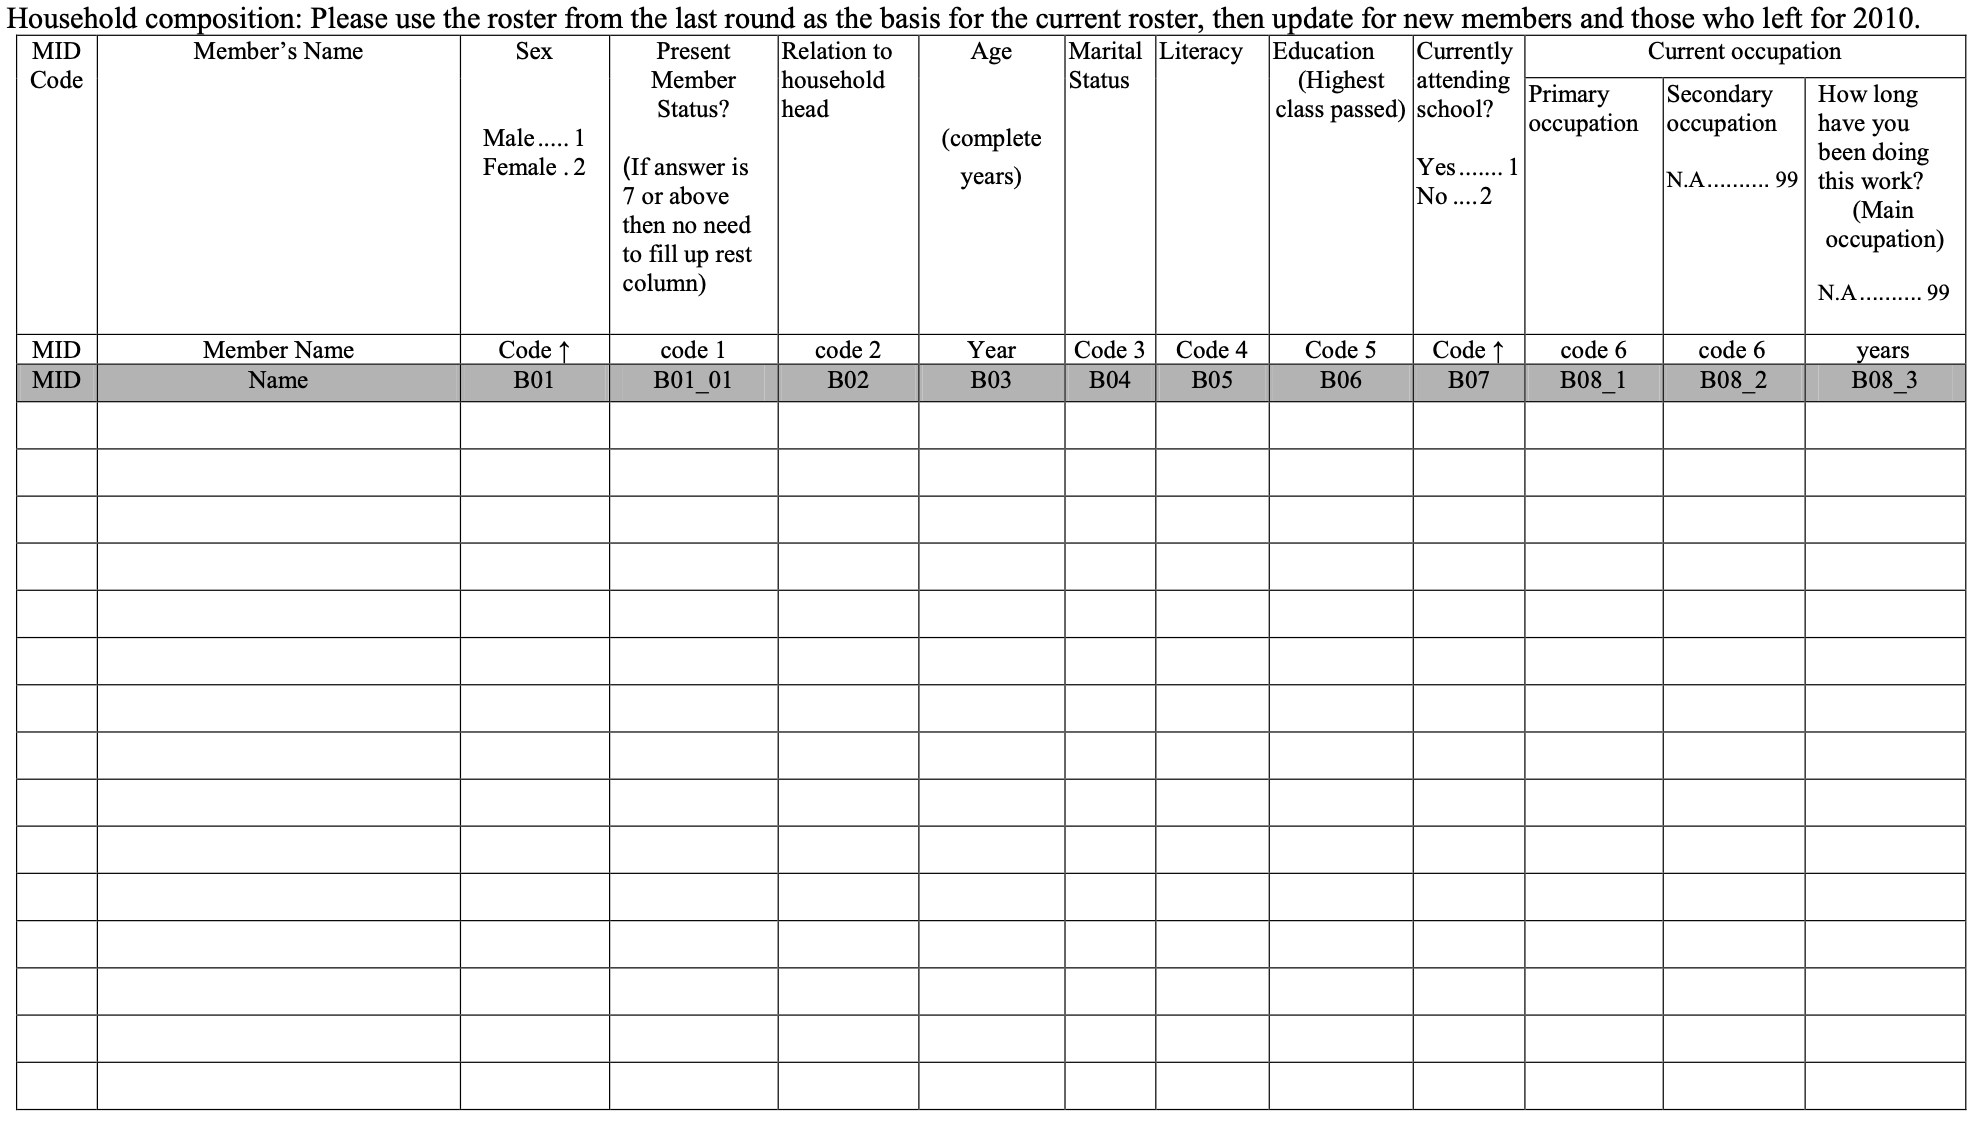

In [409]:
filename = "002_mod_b.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,mid,b01,b01_1,b02,b03,b04,b05,b06,b07,b08_1,b08_2,b08_3
0,1.0,1,1,0,1.0,47.0,2.0,4.0,6.0,2.0,4.0,5.0,25.0
1,1.0,2,2,0,2.0,40.0,2.0,4.0,6.0,2.0,21.0,5.0,22.0
2,1.0,3,1,0,3.0,19.0,1.0,4.0,12.0,1.0,20.0,4.0,6.0
3,1.0,4,2,0,3.0,17.0,1.0,4.0,9.0,1.0,20.0,5.0,4.0
4,1.0,5,2,0,3.0,13.0,1.0,4.0,6.0,1.0,20.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,799.0,9,2,2,4.0,16.0,2.0,4.0,5.0,2.0,21.0,99.0,99.0
4537,800.0,1,1,0,2.0,37.0,2.0,1.0,99.0,2.0,23.0,99.0,99.0
4538,800.0,2,2,0,1.0,32.0,2.0,1.0,99.0,2.0,21.0,4.0,10.0
4539,800.0,3,1,0,3.0,7.0,1.0,4.0,1.0,1.0,20.0,99.0,99.0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 0 to 4540
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hhid    4541 non-null   float32
 1   mid     4541 non-null   int8   
 2   b01     4541 non-null   int8   
 3   b01_1   4541 non-null   int8   
 4   b02     3870 non-null   float64
 5   b03     3870 non-null   float64
 6   b04     3870 non-null   float64
 7   b05     3870 non-null   float64
 8   b06     3870 non-null   float64
 9   b07     3870 non-null   float64
 10  b08_1   3870 non-null   float64
 11  b08_2   3870 non-null   float64
 12  b08_3   3870 non-null   float64
dtypes: float32(1), float64(9), int8(3)
memory usage: 385.8 KB


### Number of members per household

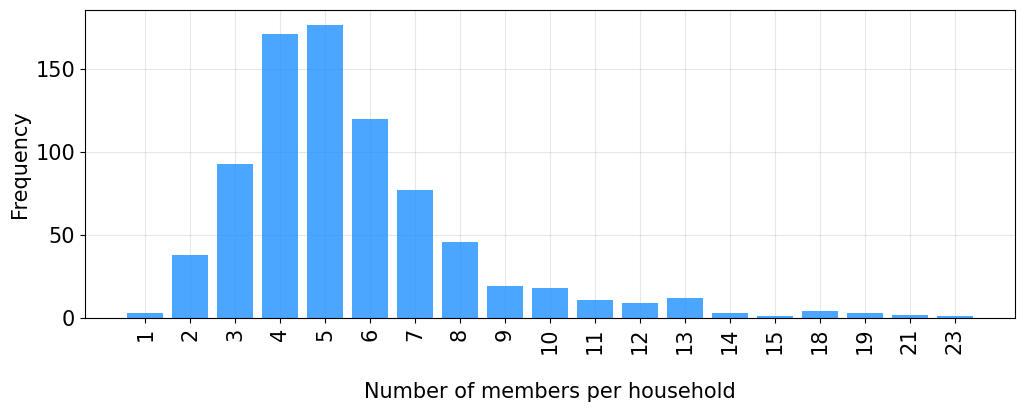

In [24]:
plot_categorical_feature_frequency(df.groupby("hhid").count(), "mid", sort=False, 
                                   xlabel="Number of members per household")

### Number of males, females per household

In [27]:
males = []
females = []
for hhid in df["hhid"].unique():
    household = df.loc[df.hhid==hhid]
    m = sum(household["b01"]==1)
    f = sum(household["b01"]==2)
    males.append(m)
    females.append(f)

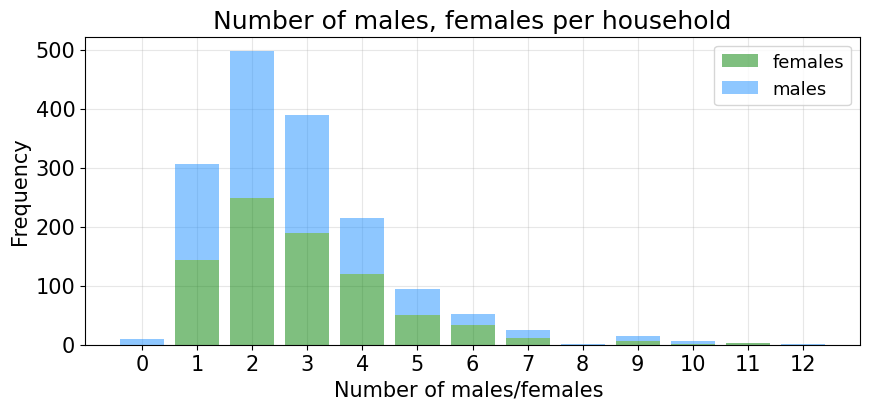

In [31]:
plt.figure(figsize=(10, 4))

f_counter = Counter(females)
for i in range(max(f_counter.keys())):
    if i not in f_counter:
        f_counter[i] = 0
female_counts = [f_counter[k] for k in sorted(f_counter.keys())]

m_counter = Counter(males)
for i in range(max(m_counter.keys())):
    if i not in m_counter:
        m_counter[i] = 0
male_counts = [m_counter[k] for k in sorted(m_counter.keys())]

while len(male_counts) > len(female_counts):
    female_counts.append(0)
while len(female_counts) > len(male_counts):
    male_counts.append(0)

plt.bar(np.arange(len(female_counts)), female_counts, 
        color="green", alpha=0.5, label="females")
plt.bar(np.arange(len(male_counts)), male_counts, 
        color="dodgerblue", alpha=0.5, label="males", bottom=female_counts)

plt.title("Number of males, females per household")
plt.xlabel("Number of males/females ")
plt.ylabel("Frequency")
plt.xticks(np.arange(13))
plt.legend()
plt.savefig("number_males_females_per_household.pdf")
plt.show()

### Age distribution

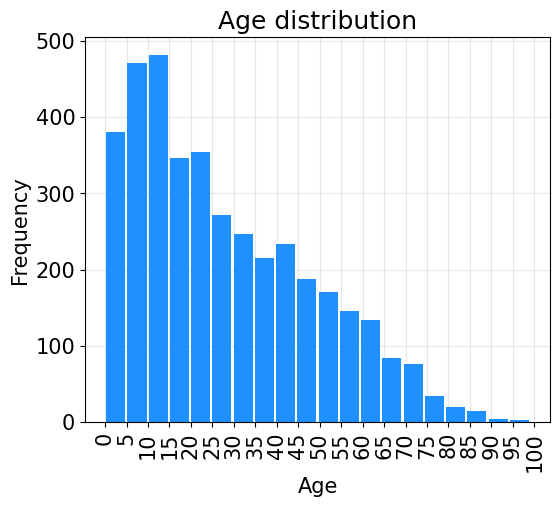

Mean age = 27.7 ± 20.5


In [32]:
ages = list(df["b03"])
ages = [a for a in ages if not np.isnan(a)]

plt.hist(ages, color="dodgerblue", rwidth=0.9, bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 105, 5), rotation=90)
plt.savefig("age_distribution.pdf")
plt.show()

print(f"Mean age = {np.mean(ages):.1f} ± {np.std(ages):.1f}")

### Literacy

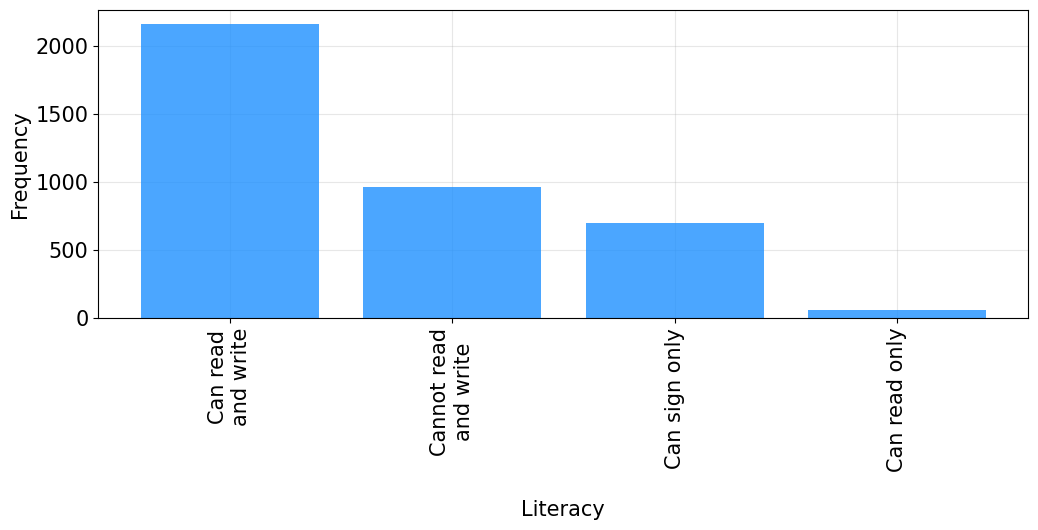

In [39]:
xticks_dict = {
    1: "Cannot read\nand write",
    2: "Can sign only",
    3: "Can read only",
    4: "Can read\nand write"
}
plot_categorical_feature_frequency(df, "b05", xlabel="Literacy", xticks_dict=xticks_dict, 
                                   save=True, save_filename="literacy.pdf")

### Education

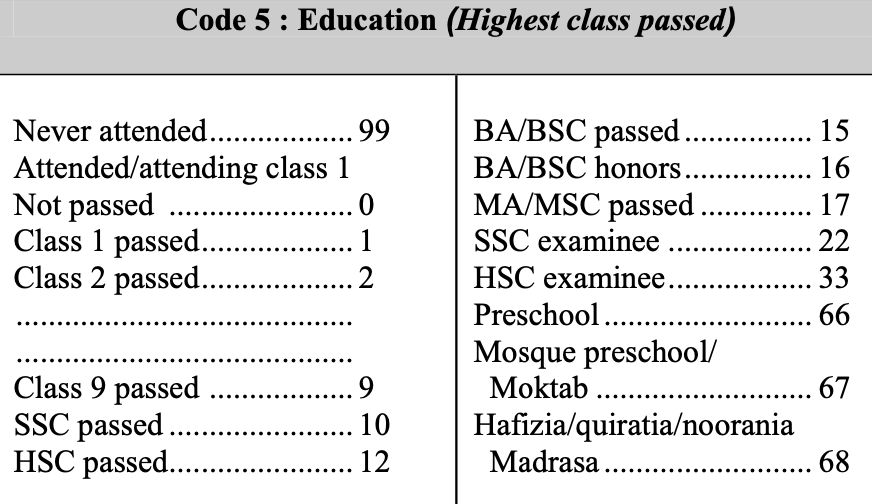

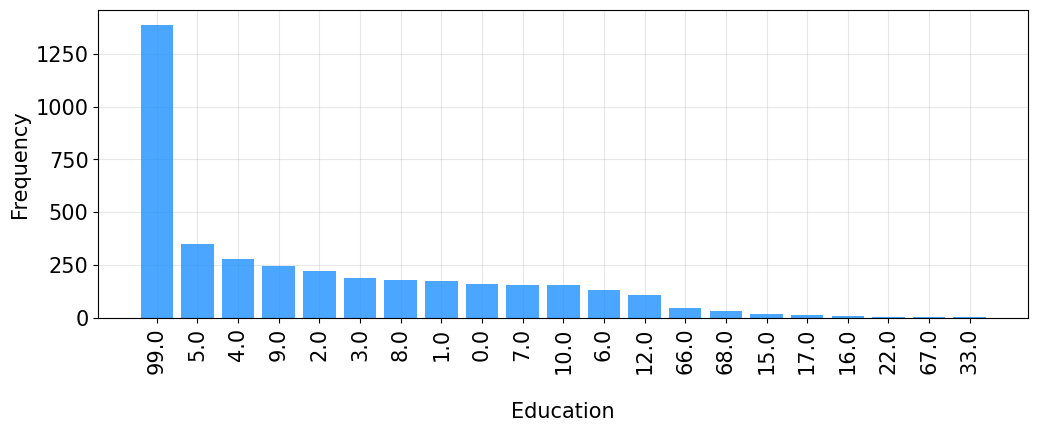

In [27]:
plot_categorical_feature_frequency(df, "b06", xlabel="Education")

In [90]:
groups = {
    (0,5):[],
    (6,9):[],
    (10,13):[],
    (14,18):[],
    (19,29):[],
    (30,39):[],
    (40,49):[],
    (50,59):[],
    (60,69):[],
    (70,100):[]
}

age_education = df[["b03", "b06"]]

for index, row in age_education.iterrows():
    age, education = row
    for g in groups:
        if g[0] <= age <= g[1]:
            groups[g].append(education)

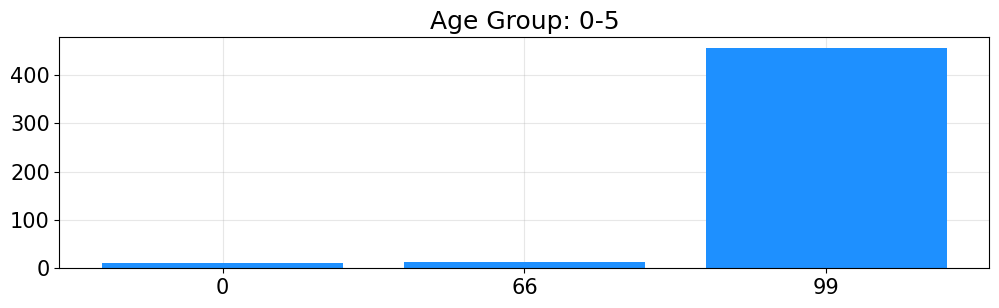

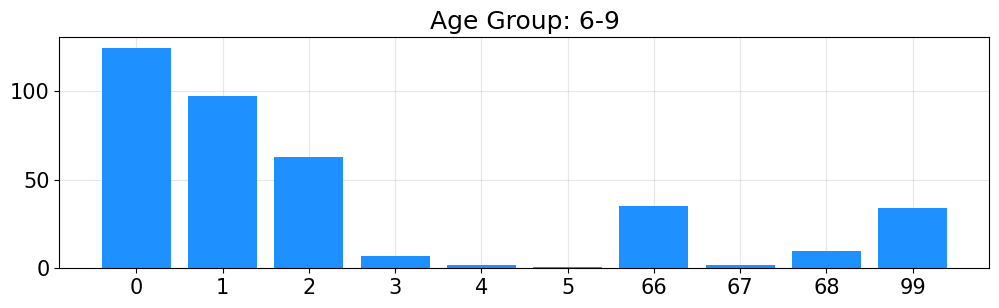

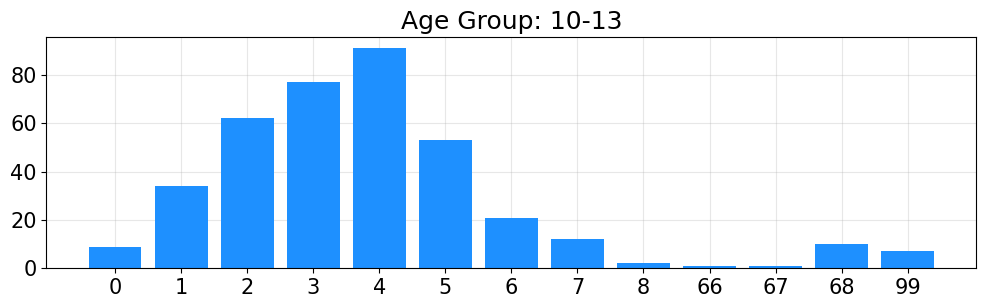

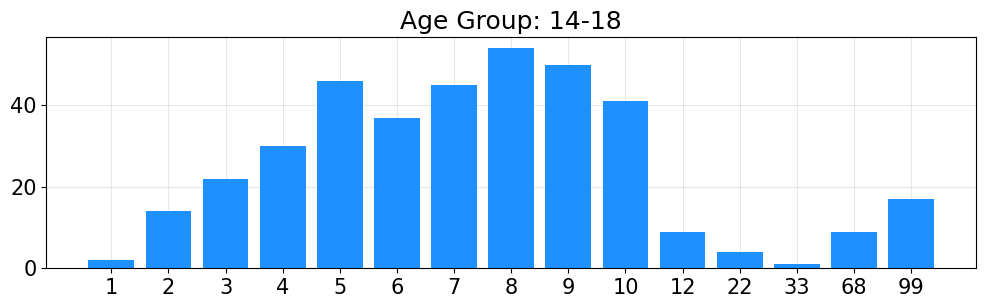

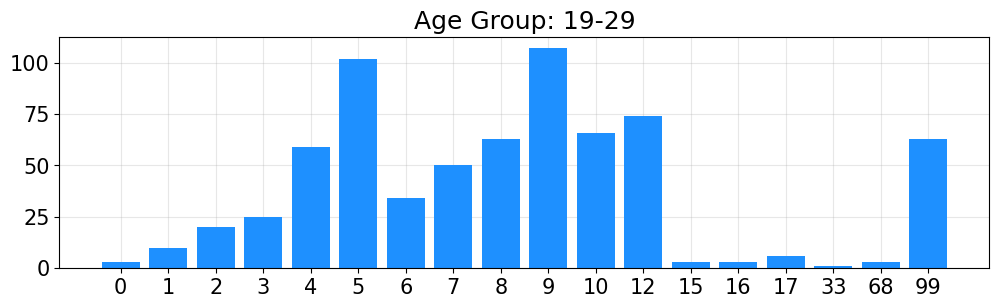

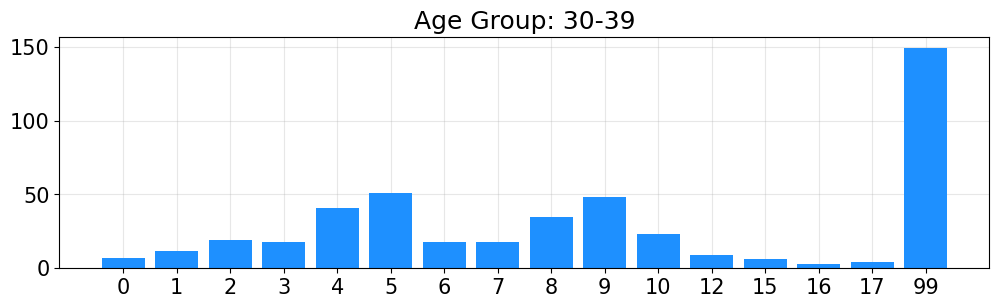

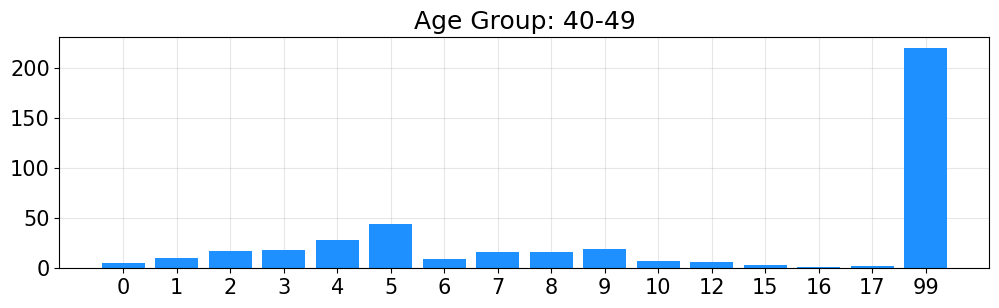

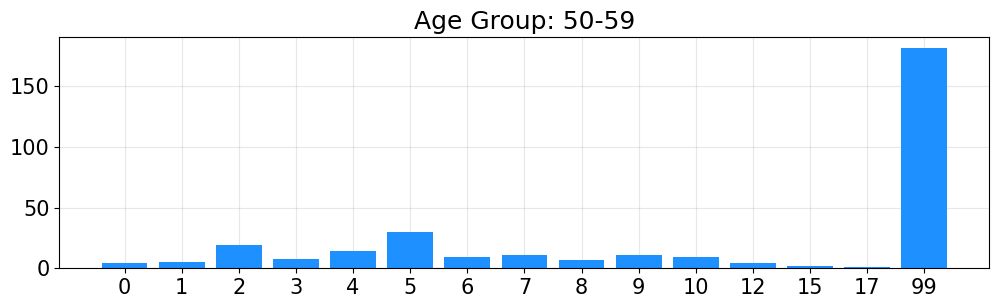

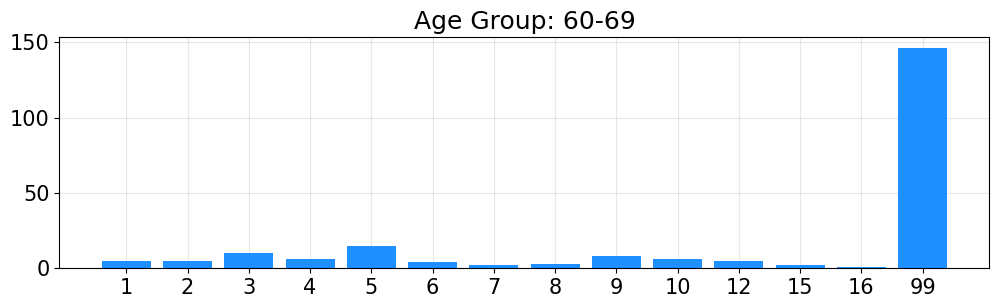

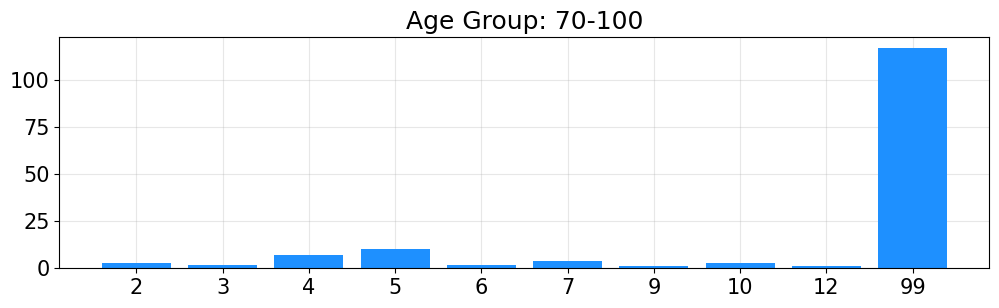

In [389]:
for i, g in enumerate(groups):
    plt.figure(figsize=(12,3))
    counts = Counter(groups[g])
    keys = sorted([key for key in counts])
    amounts = [counts[key] for key in keys]
    plt.bar(np.arange(len(keys)), amounts, color="dodgerblue")
    plt.title(f"Age Group: {g[0]}-{g[1]}")
    plt.xticks(np.arange(len(keys)), [int(k) for k in keys])
    plt.show()

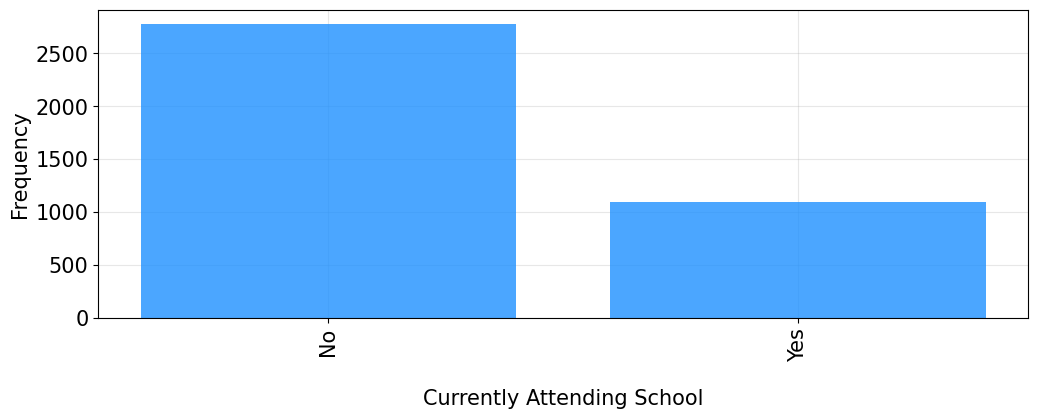

In [259]:
xticks_dict = {
    1: "Yes",
    2: "No"
}

plot_categorical_feature_frequency(df, "b07", xlabel="Currently Attending School", xticks_dict=xticks_dict)

### Occupation

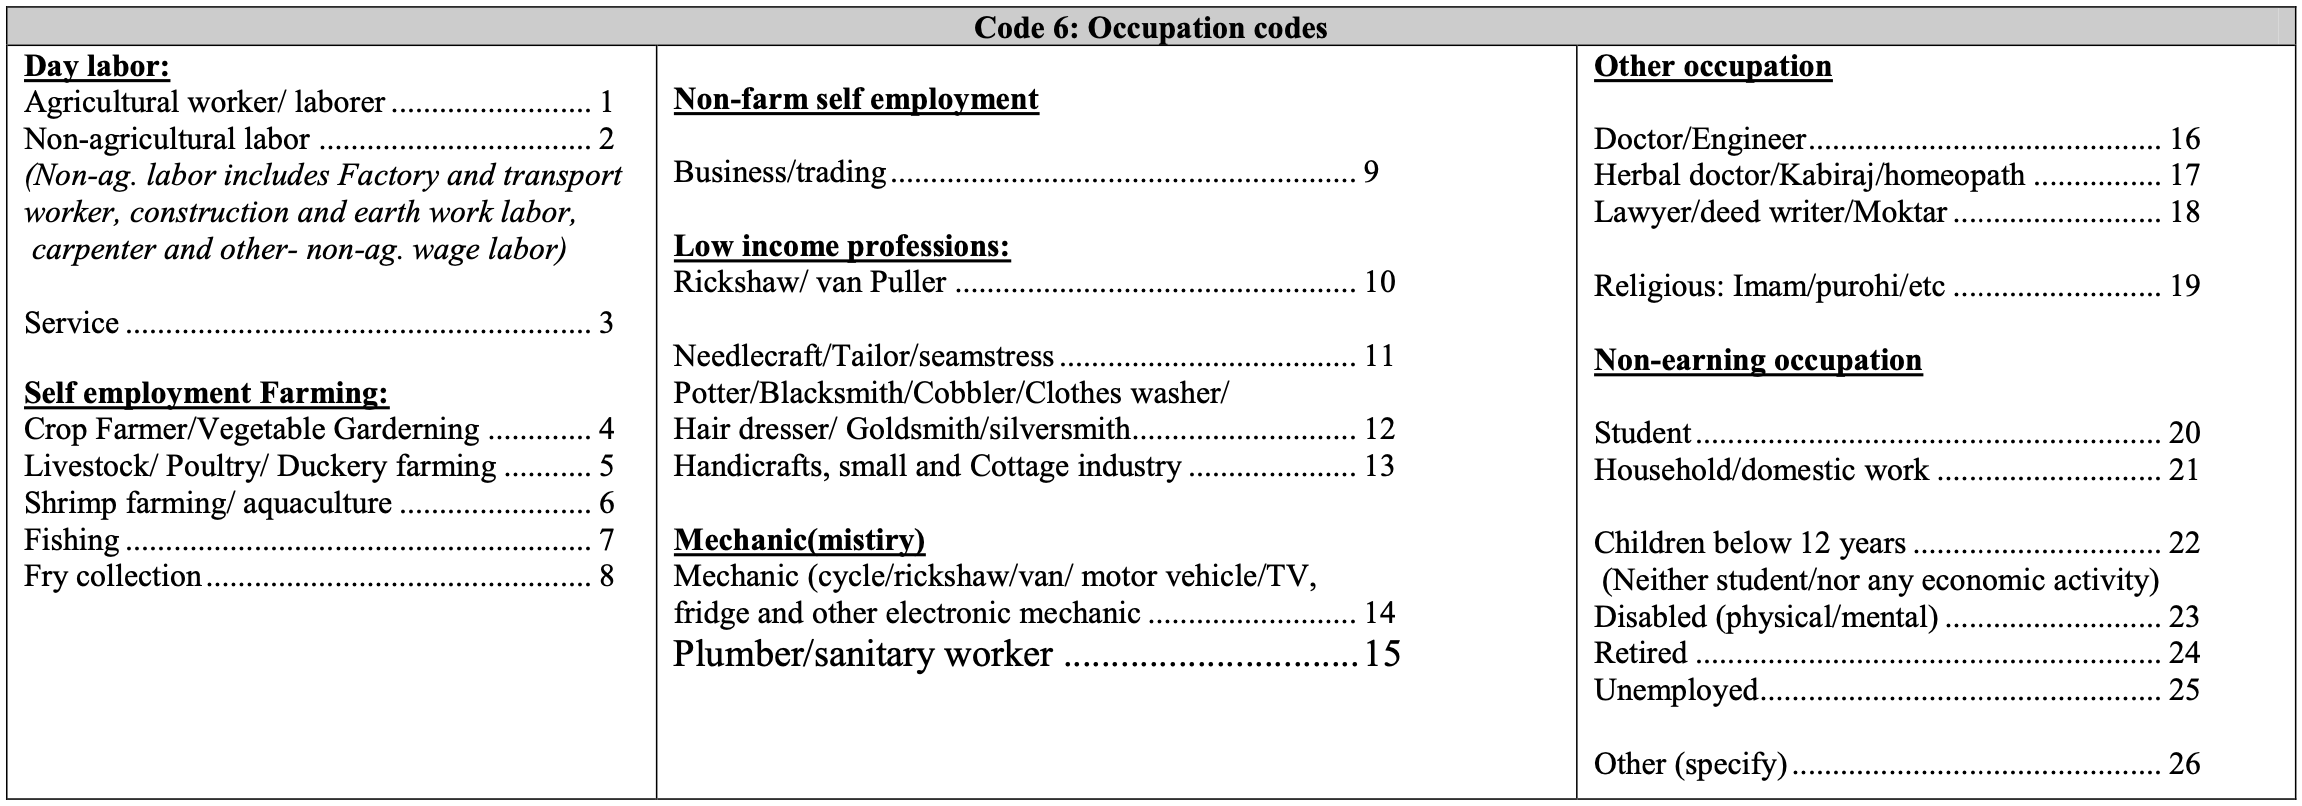

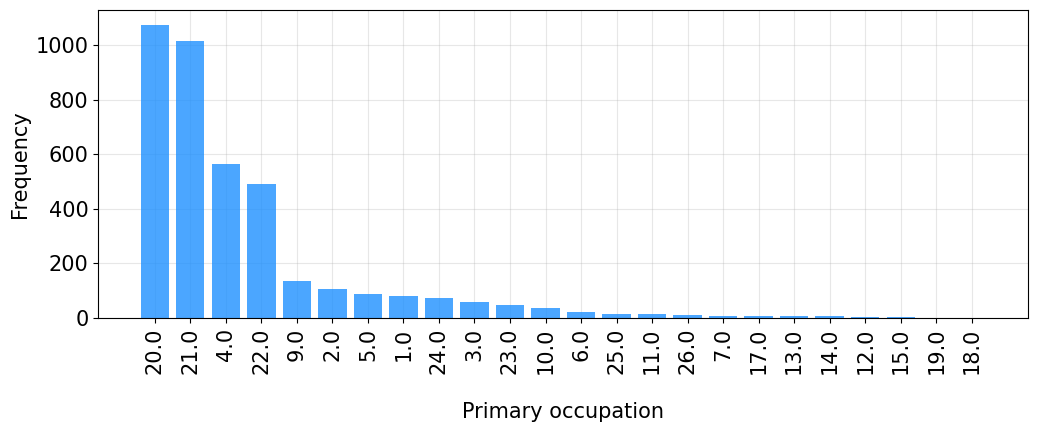

In [260]:
plot_categorical_feature_frequency(df, "b08_1", xlabel="Primary occupation")

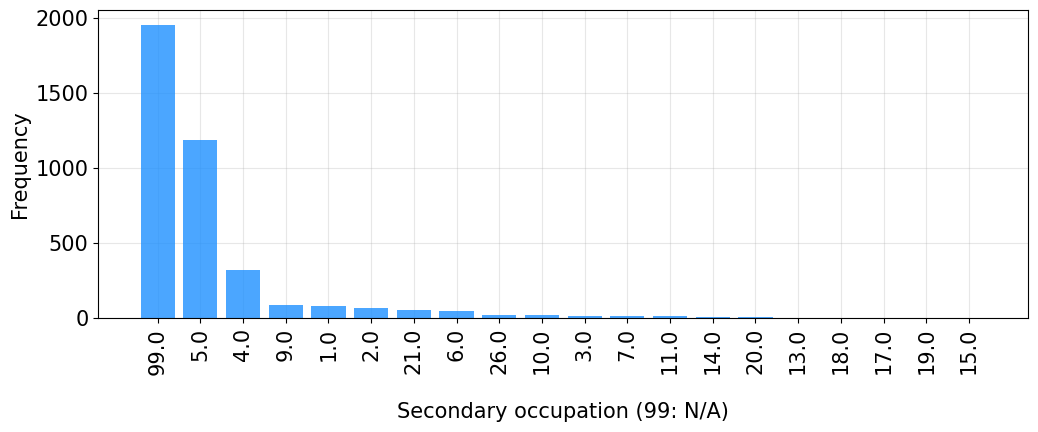

In [261]:
plot_categorical_feature_frequency(df, "b08_2", xlabel="Secondary occupation (99: N/A)")

___

## Module O: Changes in farming practices due to climate change

In [47]:
codes = [
    "change crop variety",
    "change crop type",
    "increase/decrease amount of land under production",
    "implement soil and water management techniques",
    "change patter of crop consumption",
    "mix crop and livestock production at the same time",
    "mix crop and fish farming production at the same time",
    "change field location",
    "build water harvesting scheme for domestic consumption",
    "build water harvesting scheme for crops",
    "build water harvesting scheme for livestock",
    "build diversion ditch",
    "plant trees for shading",
    "irrigated",
    "irrigated more",
    "buy insurance", 
    "change from crop to livestock production",
    "change from livestock to crop production",
    "seek off farm employment",
    "migrate to this place from another place",
    "set up communcal seed banks/food storage facilities",
    "change planting dates in Aman/Kharif 2",
    "change planting dates in Aus/Kharif 1",
    "change planting dates in Boro/Rabi",
    "change fertilizer application in Aman/Kharif",
    "change fertilizer application in Aus/Kharif",
    "change fertilizer application in Boro/Rabi"
]

In [48]:
filename = "019_mod_o.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,rid,o01,o02_1,o02_21,o02_22,o02_31,o02_32,o03_1,o03_21,...,o26_1,o26_2,o26_3,o27_1,o27_2,o27_3,o28_1,o28_2,o28_3,o29
0,1.0,1,1,1.0,11.0,39.0,38.0,22.0,2.0,NaN,...,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0
1,2.0,1,1,1.0,11.0,NaN,30.0,NaN,1.0,19.0,...,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,1.0
2,3.0,1,1,1.0,11.0,NaN,32.0,NaN,2.0,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
3,4.0,1,1,1.0,39.0,NaN,30.0,NaN,2.0,NaN,...,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,2.0
4,5.0,3,1,1.0,39.0,NaN,49.0,NaN,2.0,NaN,...,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,796.0,1,1,1.0,39.0,NaN,11.0,NaN,2.0,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
801,797.0,1,1,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
802,798.0,1,1,1.0,3.0,NaN,28.0,NaN,2.0,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
803,799.0,8,1,1.0,11.0,NaN,29.0,NaN,2.0,NaN,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0


In [49]:
cols = []
for i in range(2, 29):
    if i < 9:
        cols.append("o0" + str(i) + "_1")
    elif i == 9:
        cols.append("o09")
    elif i < 23:
        cols.append("o" + str(i))
    else:
        cols.append("o" + str(i) + "_1")

In [50]:
change = {}
for c in cols:
    change[c] = dict(Counter(df.loc[df[c].notnull(), c]))

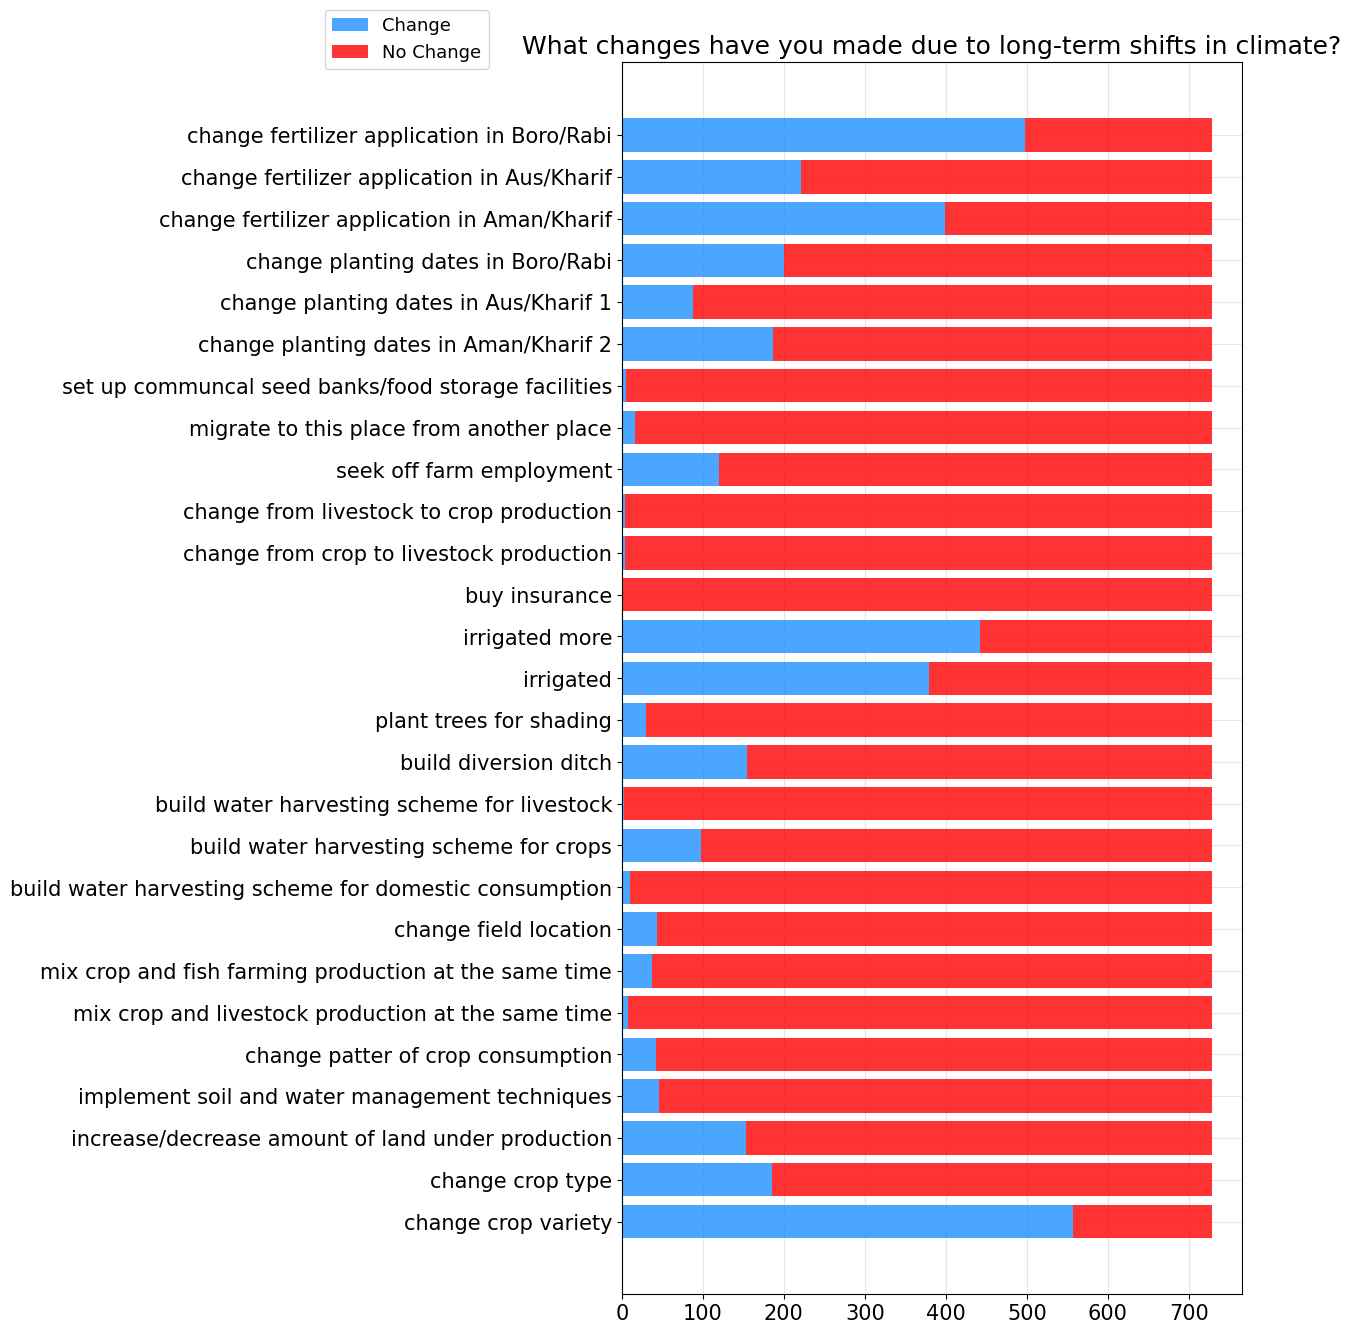

In [51]:
plt.figure(figsize=(8,16))
for row, c in enumerate(change):
    if row == len(change)-1:
        plt.barh(row, change[c].get(1) or [0], color="dodgerblue", label="Change", alpha=0.8)
        plt.barh(row, change[c].get(2) or [0], left=change[c].get(1), color="red", label="No Change", alpha=0.8)
    else:
        plt.barh(row, change[c].get(1) or [0], color="dodgerblue", alpha=0.8)
        plt.barh(row, change[c].get(2) or [0], left=change[c].get(1), color="red", alpha=0.8)

plt.legend(bbox_to_anchor=[-0.2,1.05])
plt.yticks(np.arange(len(change)), codes)
plt.title("What changes have you made due to long-term shifts in climate?")
plt.savefig("changes_made_due_to_climate_change.pdf")
plt.show()

## Module O1: Changes to livestock / poultry

In [52]:
filename = "020_mod_o1.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,o1_01_1,o1_02_1,o1_03_1,o1_01_2,o1_02_2,o1_03_2,o1_01_3,o1_02_3,o1_03_3,...,o1_03_6,o1_01_7,o1_02_7,o1_03_7,o1_01_8,o1_02_8,o1_03_8,o1_01_9,o1_02_9,o1_03_9
0,1.0,2,NaN,NaN,2,NaN,NaN,1,1.0,2.0,...,NaN,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
1,2.0,2,NaN,NaN,2,NaN,NaN,1,1.0,2.0,...,NaN,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
2,3.0,2,NaN,NaN,2,NaN,NaN,1,1.0,2.0,...,NaN,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
3,4.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,8.0,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
4,5.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,NaN,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,796.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,6.0,1,9.0,10.0,2,NaN,NaN,2,NaN,NaN
801,797.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
802,798.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
803,799.0,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,...,NaN,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN


In [64]:
codes = [
    "change animal breed",
    "increase number of livestock",
    "decrease number of livestock",
    "diversify livestock feeds",
    "change livestock feeds",
    "supplement livestock feeds",
    "change veterinary interventions",
    "change portfolio of animal species",
    "move animals to another site"
]

In [65]:
cols = ["o1_01_" + str(i) for i in range(1, 10)]
change = {}
for c in cols:
    change[c] = dict(Counter(df.loc[df[c].notnull(), c]))

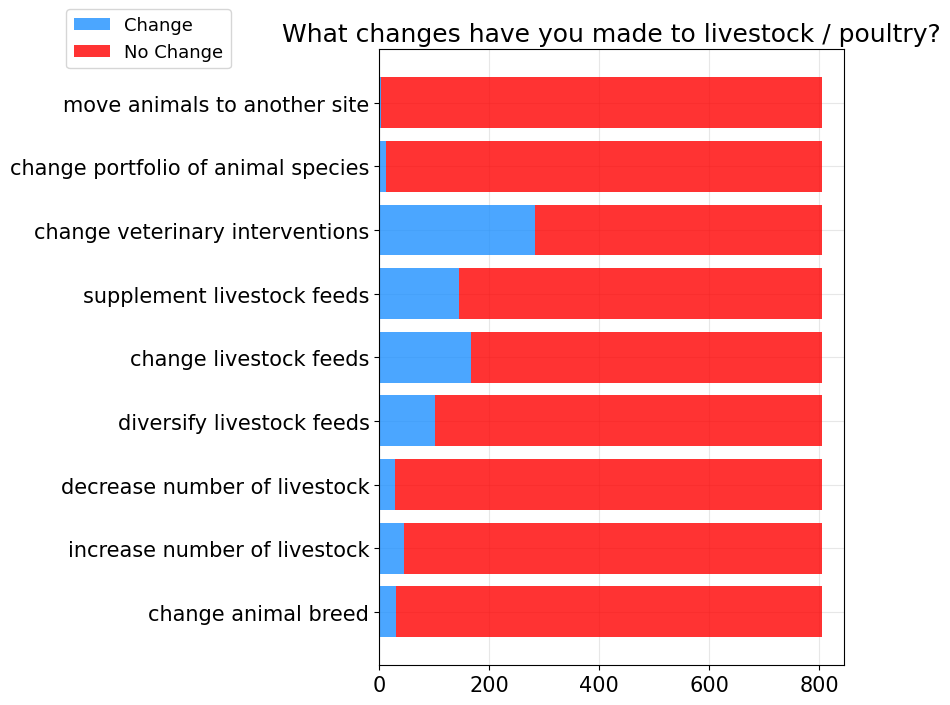

In [66]:
plt.figure(figsize=(6,8))
for row, c in enumerate(change):
    if row == len(change)-1:
        plt.barh(row, change[c].get(1) or [0], color="dodgerblue", label="Change", alpha=0.8)
        plt.barh(row, change[c].get(2) or [0], left=change[c].get(1), color="red", label="No Change", alpha=0.8)
    else:
        plt.barh(row, change[c].get(1) or [0], color="dodgerblue", alpha=0.8)
        plt.barh(row, change[c].get(2) or [0], left=change[c].get(1), color="red", alpha=0.8)

plt.legend(bbox_to_anchor=[-0.3,1.08])
plt.yticks(np.arange(len(change)), codes)
plt.title("What changes have you made to livestock / poultry?")
plt.show()

## Module O2: Contraints to adaptation

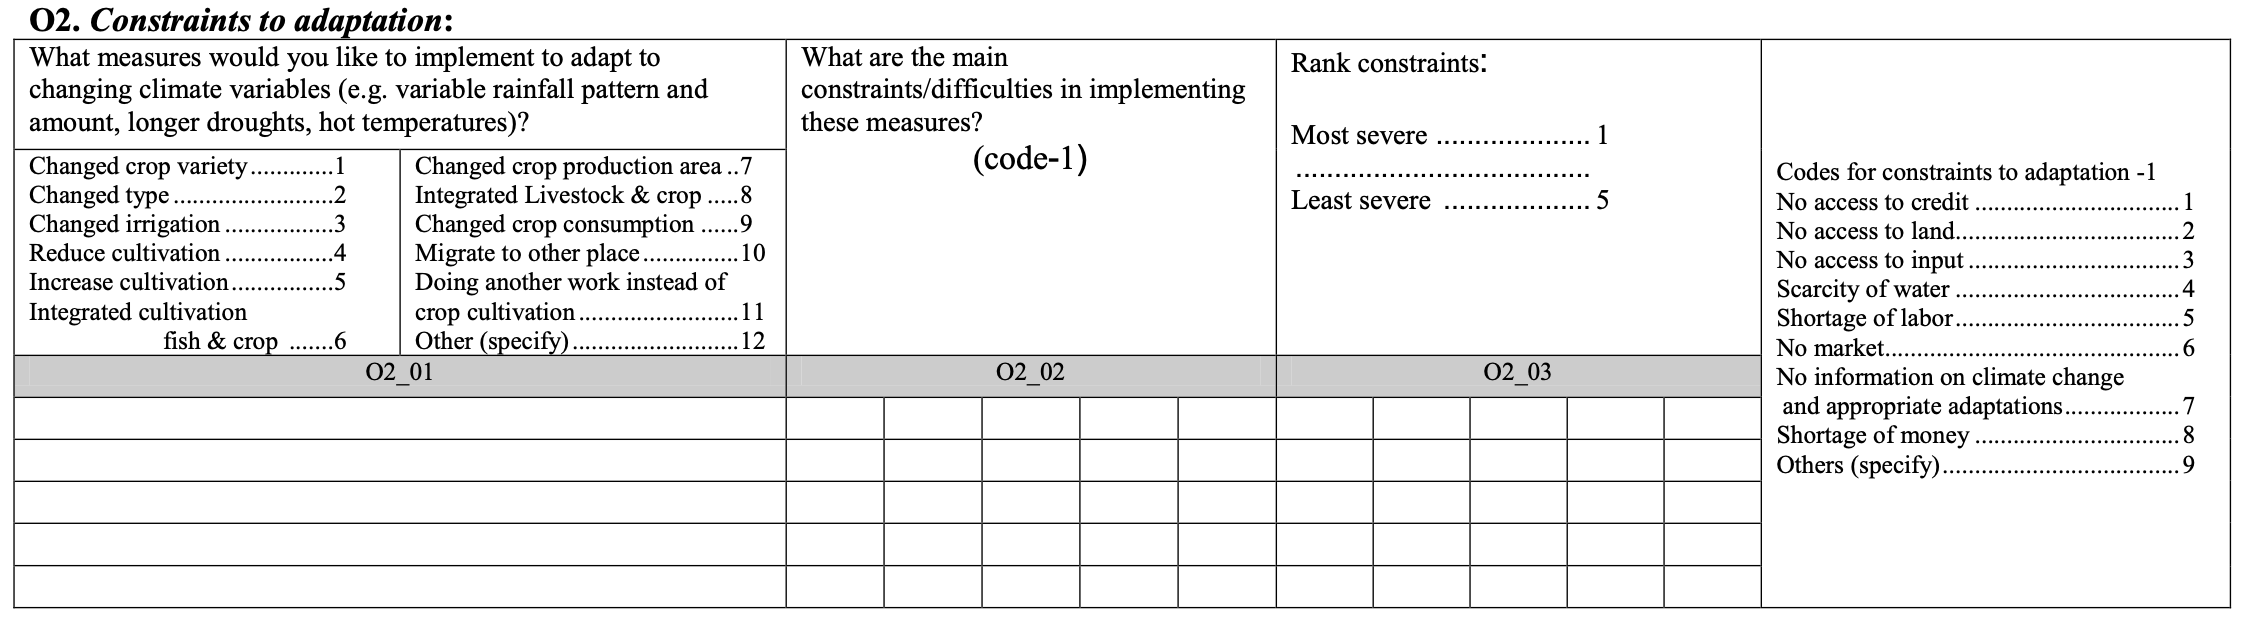

In [461]:
codes = [
    "changed crop variety",
    "changed type",
    "change irrigation",
    "reduce cultivation",
    "increase cultivation",
    "integrated cultivation fish & crop",
    "changed crop production area",
    "integrated livestock & crop",
    "changed crop consumption",
    "migrate to other place",
    "doing another work instead of crop cultivation",
    "other",
    '88 (?)'
]

In [462]:
filename = "021_mod_o2.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,o2_01,o2_02_1,o2_02_2,o2_02_3,o2_02_4,o2_02_5,o2_03_1,o2_03_2,o2_03_3,o2_03_4,o2_03_5
0,1.0,1,3.0,7.0,8.0,NaN,NaN,1.0,2.0,3.0,NaN,NaN
1,1.0,3,8.0,4.0,3.0,NaN,NaN,1.0,2.0,3.0,NaN,NaN
2,1.0,4,9.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,1.0,12,7.0,8.0,3.0,NaN,NaN,1.0,2.0,3.0,NaN,NaN
4,1.0,12,8.0,3.0,7.0,NaN,NaN,1.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,799.0,1,8.0,4.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
2431,799.0,4,8.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2432,799.0,11,8.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2433,799.0,12,8.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


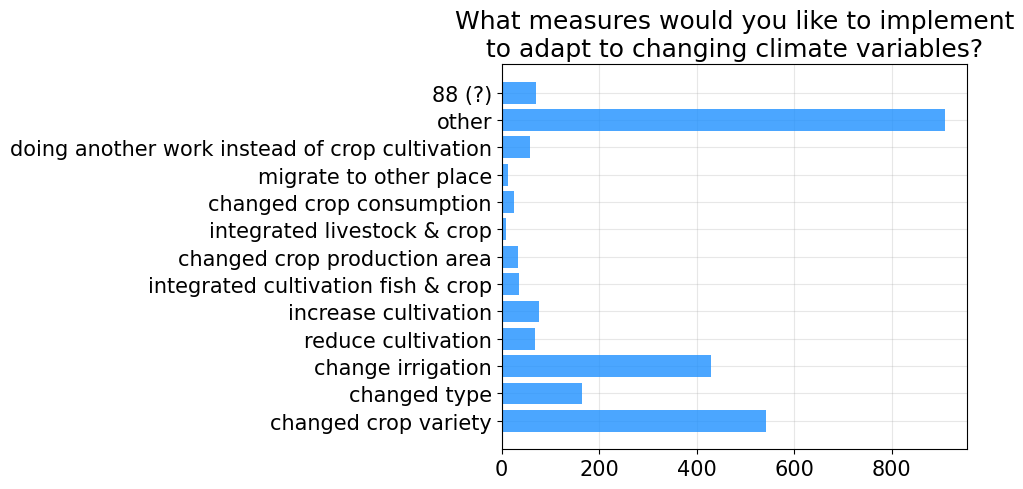

In [61]:
c = "o2_01"
counts = dict(Counter(df.loc[df[c].notnull(), c]))
keys = [k for k in sorted(counts.keys())]
vals = [counts[k] for k in keys]

for i,k in enumerate(keys):
    plt.barh(i, vals[i], color="dodgerblue", alpha=0.8)
plt.yticks(np.arange(len(keys)), codes)
plt.title("What measures would you like to implement\nto adapt to changing climate variables?")
plt.show()

In [135]:
# investigate high number of 'other' responses...
constraints_cols = [
    "o2_02_1", "o2_03_1",
    "o2_02_2", "o2_03_2",
    "o2_02_3", "o2_03_3",
    "o2_02_4", "o2_03_4",
    "o2_02_5", "o2_03_5",
]

other_responses = df.loc[df["o2_01"]==12][constraints_cols]
other_responses

,o2_02_1,o2_03_1,o2_02_2,o2_03_2,o2_02_3,o2_03_3,o2_02_4,o2_03_4,o2_02_5,o2_03_5
3,7.0,1.0,8.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN
4,8.0,1.0,3.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN
5,8.0,1.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,7.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2424,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2425,8.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2428,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2429,8.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
constraints_codes = {
    1:"no access to credit",
    2:"no access to land",
    3:"no access to input",
    4:"scarcity of water",
    5:"shortage of labor",
    6:"no market",
    7:"no information on climate change\nand appropriate adaptations",
    8:"shortage of money",
    9:"others"
}

In [140]:
counts = {}
i = 0
while i < 9:
    data = other_responses[[constraints_cols[i], constraints_cols[i+1]]]
    code = list(data[constraints_cols[i]])
    importance = list(data[constraints_cols[i+1]])
    for idx in range(len(code)):
        c, imp = code[idx], importance[idx]
        if np.isnan(c) or np.isnan(imp):
            continue
        else:
            t = (imp, c)
            if t not in counts:
                counts[t] = 1
            else:
                counts[t] += 1
    i+=2

In [141]:
[(k,v) for k,v in counts.items() if k[0]==1]

[((1.0, 7.0), 157),
 ((1.0, 8.0), 445),
 ((1.0, 9.0), 52),
 ((1.0, 3.0), 107),
 ((1.0, 4.0), 79),
 ((1.0, 2.0), 15),
 ((1.0, 5.0), 12),
 ((1.0, 6.0), 17),
 ((1.0, 1.0), 14)]

In [142]:
sorted_keys = sorted([k[1] for k,v in counts.items() if k[0]==1], key=lambda x:counts[(1.0, x)], reverse=True)

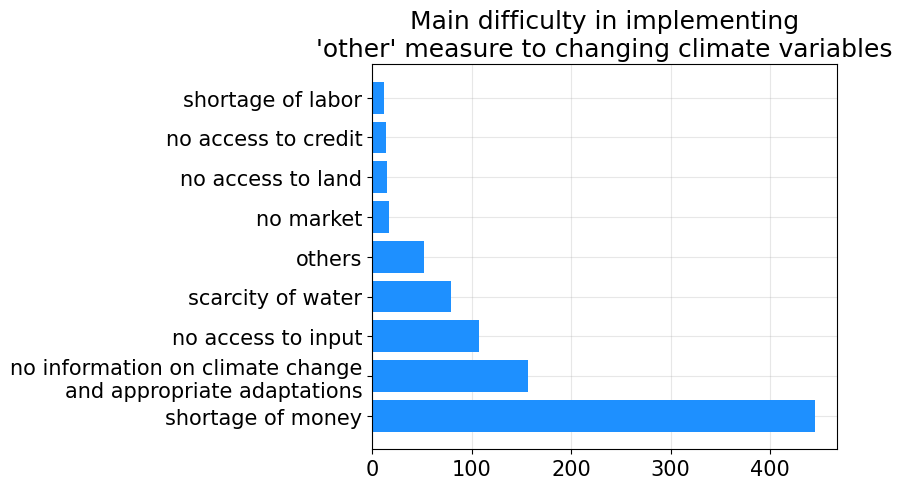

In [147]:
plt.barh(np.arange(9), width=[445, 157, 107, 79, 52, 17, 15, 14, 12], color="dodgerblue")
plt.yticks(np.arange(9), labels=[constraints_codes[k] for k in sorted_keys],
           rotation=0)
plt.title("Main difficulty in implementing\n'other' measure to changing climate variables")
plt.show()

## Module T: Employment

In [350]:
filename = "032_mod_t.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,mid,t01,t02,t03,t04,t05,t06,t07,t08,t09,t10,t11,t12,t13,t14
0,1.0,1,1,NaN,NaN,NaN,64.0,1.0,5.0,2.0,3.0,NaN,NaN,NaN,NaN,5500.0
1,1.0,1,1,NaN,NaN,NaN,70.0,2.0,5.0,0.5,3.0,NaN,NaN,NaN,NaN,0.0
2,1.0,2,1,NaN,NaN,NaN,69.0,3.0,7.0,0.5,3.0,NaN,NaN,NaN,NaN,150.0
3,1.0,2,2,NaN,NaN,NaN,70.0,4.0,7.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
4,1.0,3,1,NaN,NaN,NaN,46.0,5.0,6.0,4.0,3.0,NaN,NaN,NaN,NaN,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,800.0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4851,800.0,2,1,NaN,NaN,NaN,64.0,1.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,1000.0
4852,800.0,2,1,NaN,NaN,NaN,70.0,2.0,7.0,0.5,3.0,NaN,NaN,NaN,NaN,0.0
4853,800.0,2,1,NaN,NaN,NaN,69.0,3.0,7.0,0.5,3.0,NaN,NaN,NaN,NaN,0.0


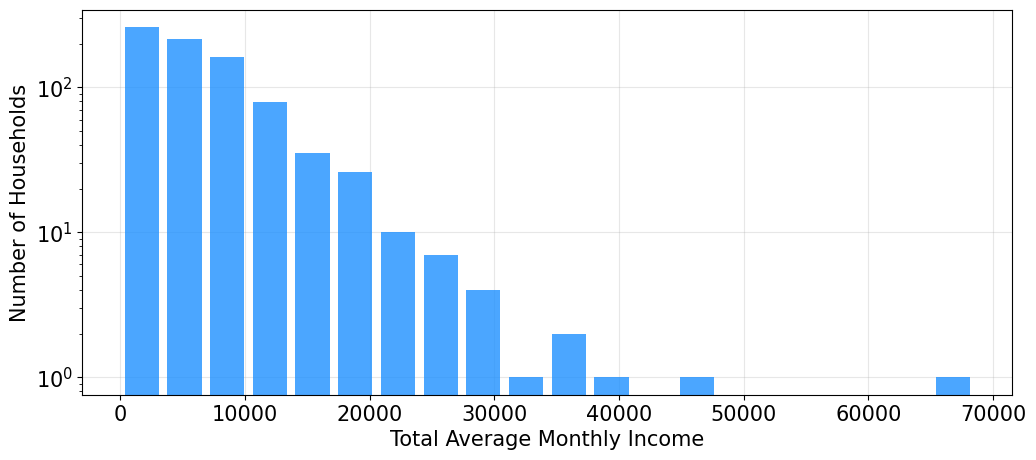

In [351]:
plt.figure(figsize=(12,5))
avg_monthly_income = dict(df.groupby("hhid").sum()["t14"])
plt.hist(avg_monthly_income.values(), bins=20, color="dodgerblue", rwidth=0.8, alpha=0.8)
plt.yscale("log")
plt.xlabel("Total Average Monthly Income")
plt.ylabel("Number of Households")
plt.show()

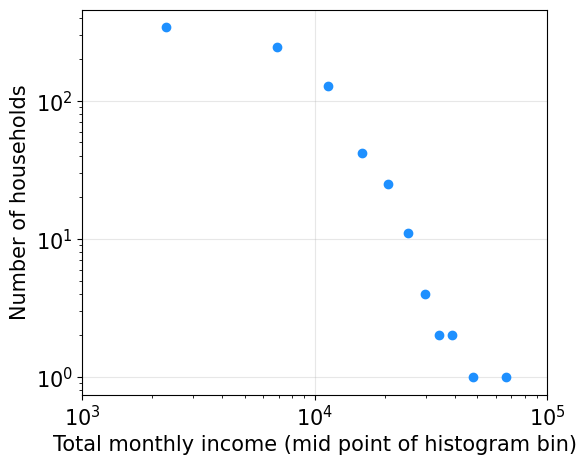

In [355]:
counts, bin_edges = np.histogram(list(avg_monthly_income.values()), bins=15)
bin_midpoints = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges)-1)]

plt.scatter(bin_midpoints, counts, color="dodgerblue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total monthly income (mid point of histogram bin)")
plt.ylabel("Number of households")
plt.xticks([10**3, 10**4, 10**5])
plt.show()

## Module F3: Livestock Expenditures

In [356]:
filename = "005_mod_f3.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,f301,f302,f303,f304_1,f304_2,f304_3,f304_4,f305_1,f305_2,f306_1,f306_2,f307,f308_1,f308_2,f308_3
0,1.0,1,1000,750,350.0,350,1.5,2.00,0,0,NaN,NaN,100,12,9.0,10.0
1,1.0,2,400,50,100.0,350,0.5,1.00,0,0,NaN,NaN,30,9,10.0,NaN
2,1.0,4,500,100,0.0,400,NaN,0.50,0,0,NaN,NaN,0,6,5.0,9.0
3,2.0,1,3000,650,700.0,400,1.5,1.50,0,0,NaN,NaN,200,9,10.0,12.0
4,2.0,4,0,0,0.0,380,NaN,0.25,0,0,NaN,NaN,0,6,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,798.0,4,200,30,0.0,620,NaN,0.50,0,0,NaN,NaN,0,6,4.0,NaN
1440,799.0,2,0,200,150.0,700,1.0,1.00,0,0,NaN,NaN,100,4,NaN,NaN
1441,799.0,4,0,0,0.0,700,NaN,1.00,0,0,NaN,NaN,0,5,6.0,4.0
1442,800.0,2,0,0,0.0,200,NaN,0.50,0,0,NaN,NaN,0,4,NaN,NaN


In [357]:
total_cost_livestock = dict(df.groupby("hhid").sum()[["f302", "f303", "f306_1", "f306_2", "f307"]].sum(axis=1))

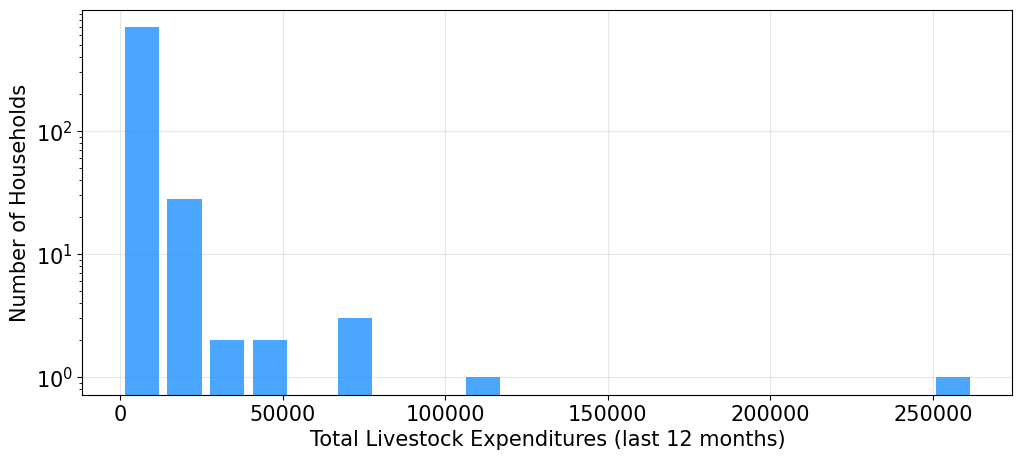

In [358]:
plt.figure(figsize=(12,5))
plt.hist(total_cost_livestock.values(), bins=20, color="dodgerblue", rwidth=0.8, alpha=0.8)
plt.yscale("log")
plt.xlabel("Total Livestock Expenditures (last 12 months)")
plt.ylabel("Number of Households")
plt.show()

## Module I: Food consumption expenditures

In [359]:
filename = "009_mod_i.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,fcode,i01,i02,i03,i04,i05,i06,i07,i08,i09
0,1.0,1,1,56.0,1.0,NaN,NaN,NaN,NaN,56.0,NaN
1,1.0,5,1,5.0,1.0,NaN,5.0,32.0,160.0,NaN,NaN
2,1.0,6,1,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,1.0,8,1,1.0,1.0,NaN,1.0,100.0,100.0,NaN,NaN
4,1.0,11,1,1.0,1.0,NaN,1.0,120.0,120.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24642,800.0,151,1,100.0,2.0,NaN,100.0,160.0,16.0,NaN,NaN
24643,800.0,153,1,250.0,2.0,NaN,250.0,30.0,7.5,NaN,NaN
24644,800.0,159,1,1.0,1.0,NaN,1.0,20.0,20.0,NaN,NaN
24645,800.0,171,1,500.0,2.0,NaN,500.0,60.0,30.0,NaN,NaN


In [360]:
total_cost_food = dict(df.groupby("hhid").sum()["i07"])

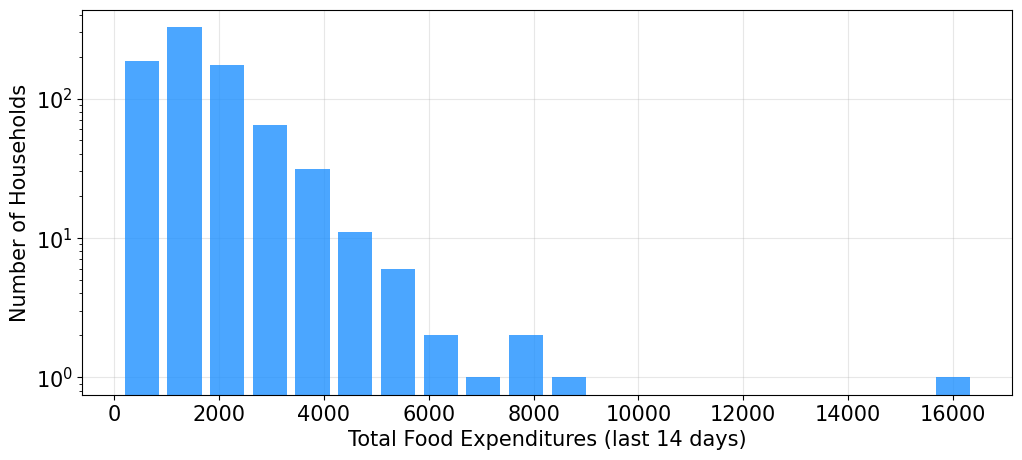

In [361]:
plt.figure(figsize=(12,5))
plt.hist(total_cost_food.values(), bins=20, color="dodgerblue", rwidth=0.8, alpha=0.8)
plt.yscale("log")
plt.xlabel("Total Food Expenditures (last 14 days)")
plt.ylabel("Number of Households")
plt.show()

## Module J: Non food expenditures

In [362]:
filename = "010_mod_j.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,nfcode,j02_1,j02_2,j03_1,j03_2,j04_1,j04_2
0,1.0,1,NaN,NaN,2000.0,NaN,2.0,NaN
1,1.0,3,NaN,NaN,500.0,NaN,2.0,NaN
2,1.0,4,NaN,NaN,300.0,NaN,2.0,NaN
3,1.0,5,260.0,NaN,NaN,NaN,NaN,NaN
4,1.0,7,40.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20346,800.0,37,NaN,1000.0,NaN,NaN,NaN,NaN
20347,800.0,38,NaN,500.0,NaN,NaN,NaN,NaN
20348,800.0,39,NaN,200.0,NaN,NaN,NaN,NaN
20349,800.0,68,10.0,30.0,NaN,NaN,NaN,NaN


In [363]:
total_cost_nonfood = dict(df.groupby("hhid").sum()["j02_2"])

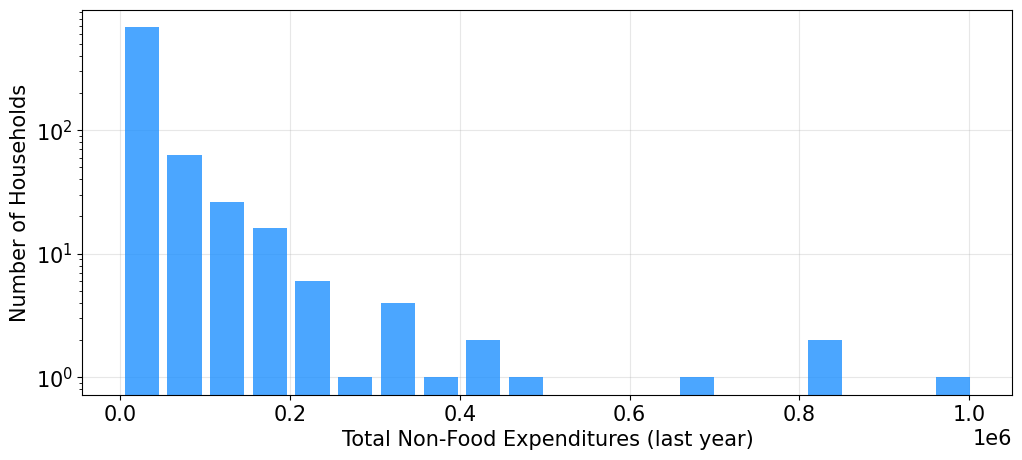

In [364]:
plt.figure(figsize=(12,5))
plt.hist(total_cost_nonfood.values(), bins=20, color="dodgerblue", rwidth=0.8, alpha=0.8)
plt.yscale("log")
plt.xlabel("Total Non-Food Expenditures (last year)")
plt.ylabel("Number of Households")
plt.show()

## Total cost from modules F3, I, J

In [403]:
total = {}
for D in [total_cost_livestock, total_cost_food, total_cost_nonfood]:
    for key in D:
        if key not in total:
            total[key] = 0
        amount = D[key]
        if D == total_cost_livestock:
            amount /= 12
        elif D == total_cost_food:
            amount *= 2
        else:
            amount /= 12
        total[key] += amount

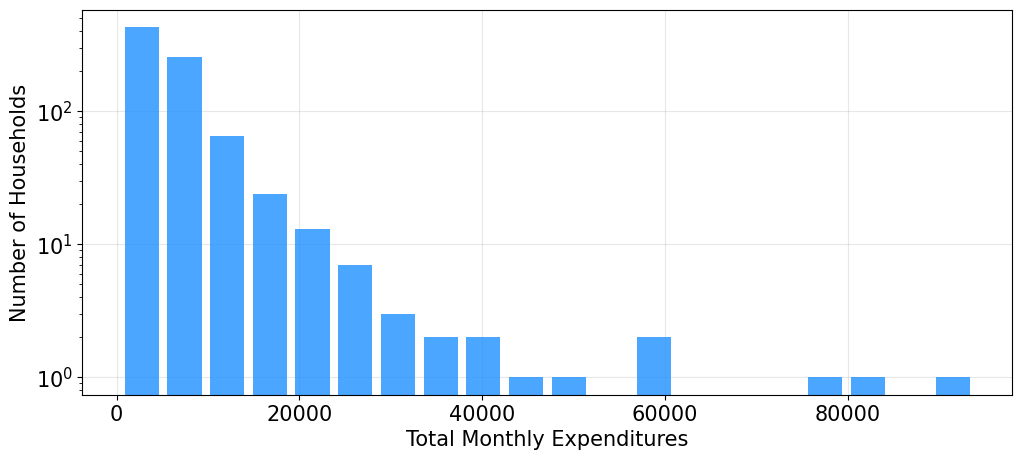

In [404]:
plt.figure(figsize=(12,5))
plt.hist(total.values(), bins=20, color="dodgerblue", rwidth=0.8, alpha=0.8)
plt.yscale("log")
plt.xlabel("Total Monthly Expenditures")
plt.ylabel("Number of Households")
plt.show()

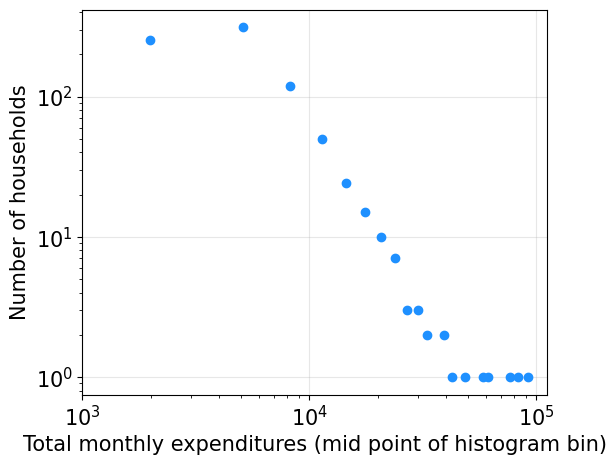

In [405]:
counts, bin_edges = np.histogram(list(total.values()), bins=30)
bin_midpoints = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges)-1)]

plt.scatter(bin_midpoints, counts, color="dodgerblue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total monthly expenditures (mid point of histogram bin)")
plt.ylabel("Number of households")
plt.xticks([10**3, 10**4, 10**5])
plt.show()

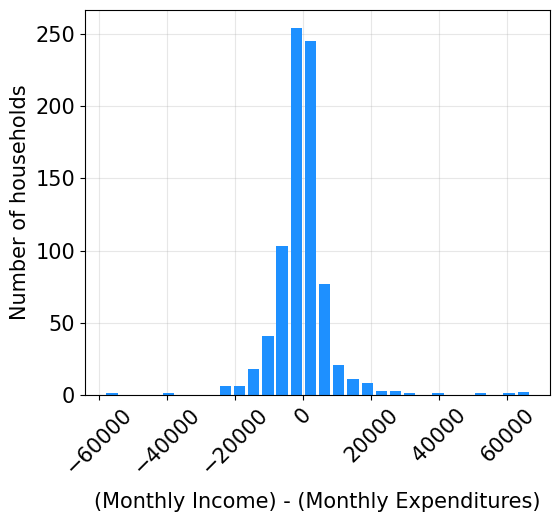

In [408]:
diff = {}
for key in total:
    try:
        diff[key] = total[key] - avg_monthly_income[key]
    except:
        continue

plt.hist(diff.values(), rwidth=0.8, color="dodgerblue", bins=30)
plt.xlabel("(Monthly Income) - (Monthly Expenditures)", labelpad=10)
plt.ylabel("Number of households")
plt.xticks(rotation=45)
plt.show()

# Correlations

### Household size and income

In [433]:
filename = "002_mod_b.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)
df

,hhid,mid,b01,b01_1,b02,b03,b04,b05,b06,b07,b08_1,b08_2,b08_3
0,1.0,1,1,0,1.0,47.0,2.0,4.0,6.0,2.0,4.0,5.0,25.0
1,1.0,2,2,0,2.0,40.0,2.0,4.0,6.0,2.0,21.0,5.0,22.0
2,1.0,3,1,0,3.0,19.0,1.0,4.0,12.0,1.0,20.0,4.0,6.0
3,1.0,4,2,0,3.0,17.0,1.0,4.0,9.0,1.0,20.0,5.0,4.0
4,1.0,5,2,0,3.0,13.0,1.0,4.0,6.0,1.0,20.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,799.0,9,2,2,4.0,16.0,2.0,4.0,5.0,2.0,21.0,99.0,99.0
4537,800.0,1,1,0,2.0,37.0,2.0,1.0,99.0,2.0,23.0,99.0,99.0
4538,800.0,2,2,0,1.0,32.0,2.0,1.0,99.0,2.0,21.0,4.0,10.0
4539,800.0,3,1,0,3.0,7.0,1.0,4.0,1.0,1.0,20.0,99.0,99.0


In [434]:
num_members = dict(df.groupby("hhid").count()["mid"])

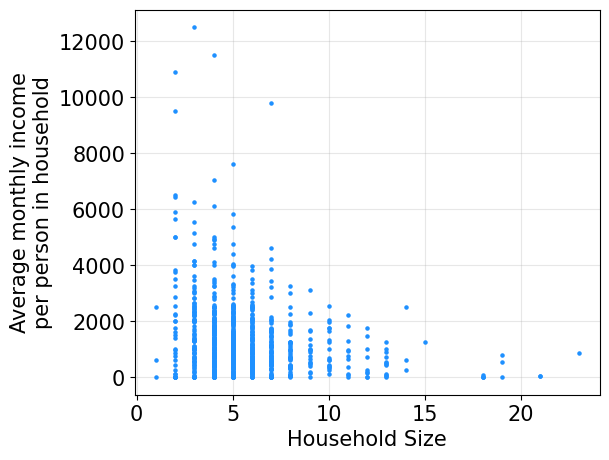

PearsonRResult(statistic=-0.23777517371182116, pvalue=8.504125109039657e-12)

In [454]:
I, S = [], []
for k in avg_monthly_income:
    if k in num_members:
        I.append(avg_monthly_income[k]/num_members[k])
        S.append(num_members[k])
        
plt.scatter(S, I, color="dodgerblue", s=5)
plt.xlabel("Household Size")
plt.ylabel("Average monthly income\nper person in household")
plt.show()

pearsonr(S, I)

### Income and expenditures

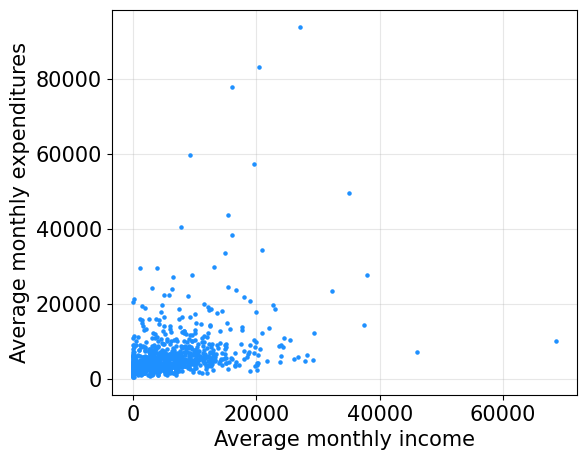

PearsonRResult(statistic=0.3392021058878614, pvalue=4.246424485827283e-23)

In [460]:
I, E = [], []
for k in avg_monthly_income:
    if k in total:
        I.append(avg_monthly_income[k])
        E.append(total[k])
        
plt.scatter(I, E, color="dodgerblue", s=5)
plt.xlabel("Average monthly income")
plt.ylabel("Average monthly expenditures")
plt.show()

pearsonr(I, E)

### Distribution of income for households that answer "other" (shortage of money) for the measure they wish they could implement

In [497]:
filename = "021_mod_o2.dta"
path = DATA_DIR + DATA_SUBDIR + filename
df = load_data(path)

In [498]:
other_count = dict(df.loc[(df["o2_01"]==12) & ( (df["o2_02_1"]==8) | (df["o2_02_2"]==8) | (df["o2_02_3"]==8) | (df["o2_02_4"]==8) | (df["o2_02_5"]==8))].groupby("hhid").count()["o2_01"])

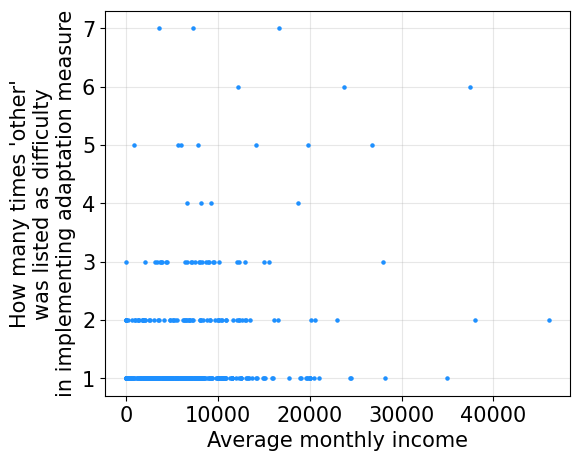

PearsonRResult(statistic=0.22822905128783663, pvalue=7.608969875166702e-06)

In [500]:
I, other = [], []
for k in avg_monthly_income:
    if k in other_count:
        I.append(avg_monthly_income[k])
        other.append(other_count[k])
        
plt.scatter(I, other, color="dodgerblue", s=5)
plt.xlabel("Average monthly income")
plt.ylabel("How many times 'other'\nwas listed as difficulty\nin implementing adaptation measure")
plt.show()

pearsonr(I, other)

In [501]:
other_count = dict(df.loc[(df["o2_01"]==12)].groupby("hhid").count()["o2_01"])

In [502]:
other_count

{1.0: 4,
 2.0: 3,
 3.0: 7,
 4.0: 4,
 5.0: 2,
 6.0: 3,
 7.0: 3,
 9.0: 2,
 10.0: 1,
 11.0: 7,
 12.0: 4,
 13.0: 5,
 14.0: 6,
 15.0: 1,
 16.0: 1,
 18.0: 1,
 19.0: 2,
 20.0: 3,
 21.0: 1,
 22.0: 1,
 23.0: 3,
 26.0: 5,
 27.0: 1,
 28.0: 1,
 29.0: 1,
 30.0: 1,
 34.0: 1,
 35.0: 3,
 36.0: 5,
 37.0: 5,
 38.0: 3,
 40.0: 4,
 41.0: 1,
 42.0: 1,
 43.0: 1,
 44.0: 2,
 45.0: 3,
 48.0: 1,
 50.0: 2,
 51.0: 5,
 53.0: 1,
 54.0: 1,
 55.0: 3,
 56.0: 2,
 57.0: 3,
 58.0: 3,
 59.0: 3,
 60.0: 3,
 61.0: 1,
 64.0: 1,
 65.0: 1,
 66.0: 1,
 67.0: 1,
 69.0: 3,
 70.0: 2,
 72.0: 4,
 76.0: 2,
 78.0: 1,
 81.0: 3,
 82.0: 1,
 83.0: 1,
 85.0: 1,
 86.0: 1,
 88.0: 1,
 89.0: 1,
 91.0: 2,
 92.0: 1,
 93.0: 1,
 96.0: 1,
 99.0: 3,
 100.0: 3,
 101.0: 1,
 102.0: 4,
 103.0: 2,
 106.0: 1,
 107.0: 2,
 112.0: 1,
 113.0999984741211: 1,
 115.0: 1,
 116.0: 3,
 117.0: 1,
 118.0: 2,
 119.0: 1,
 122.0: 2,
 124.0: 1,
 125.0: 1,
 136.0: 1,
 141.0: 2,
 142.0: 1,
 143.10000610351562: 2,
 143.1999969482422: 1,
 144.0: 1,
 147.0: 1,
 148.0: 2,
 149.0:

(array([469., 305.,  82.,  26.,   7.,  10.,   3.,   0.,   0.,   1.]),
 array([    0.,  6850., 13700., 20550., 27400., 34250., 41100., 47950.,
        54800., 61650., 68500.], dtype=float32),
 <BarContainer object of 10 artists>)

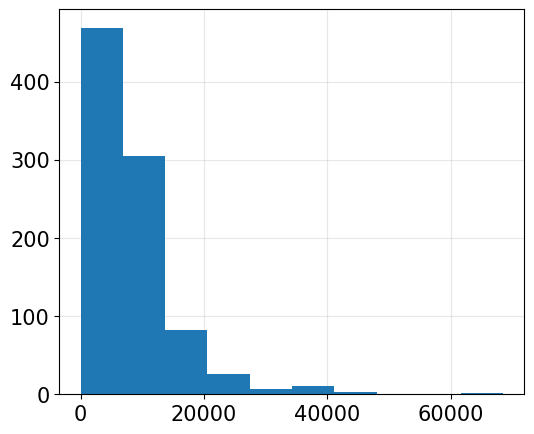

In [504]:
plt.hist(asdf)

In [507]:
counts, bin_edges = np.histogram(list(avg_monthly_income.values()), bins=15)
bin_midpoints = [np.mean(bin_edges[i:i+2]) for i in range(len(bin_edges)-1)]


In [508]:
bin_midpoints

[2283.3333,
 6850.0,
 11416.666,
 15983.333,
 20550.0,
 25116.668,
 29683.332,
 34250.0,
 38816.664,
 43383.336,
 47950.0,
 52516.664,
 57083.336,
 61650.0,
 66216.664]